In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression

In [2]:
# Loading the dataset
df = pd.read_csv('used_cars_data.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 1. Data Cleaning

#### a) Please remove the following columns: ‘S.No’ and ‘New_Price’.

In [5]:
# Dropping the columns
df_new = df.drop(columns=['S.No.', 'New_Price'])
df_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


Dropping serial number because it adds no value and new_price has too many missing values 

#### b) Please create ‘Car_Age’ feature which is defined as the difference between the current year and the year the car was built.

In [8]:
# Calculating the car age = 2024- year
df_new['Car_Age'] = date.today().year - df_new['Year']
df_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


#### Since we have years ranging from 1996 to 2019 calculating car age will help in analyzing more relevant features

#### c) Splitting name to manufacturer and brand

In [11]:
def split_name(name):
    words = name.split()
    brand = words[0] 
    model = ' '.join(words[1:3])
    return pd.Series([brand, model])

df_new[['Brand', 'Model']] = df_new['Name'].apply(split_name)

df_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11,Audi,A4 New


#### Name consist of brand and model which can help with handling further analysis independently

In [13]:
df_new.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

#### Isuzu and ISUZU is same , Mini is incorrect and also Land is incorrect. Changing it to proper name 

In [15]:
df_new.loc[df_new.Brand == 'ISUZU','Brand']='Isuzu'
df_new.loc[df_new.Brand=='Mini','Brand']='Mini Cooper'
df_new.loc[df_new.Brand=='Land','Brand']='Land Rover'
df_new.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [16]:
df_new.Model.isnull().sum()

0

#### c) There are two records for Electric vehicles. The corresponding mileage columns are empty. Please search internet what will be the reasonable value and fill out it. Please provide the logics with the reference.


In [18]:
elec_veh = df_new[df_new['Fuel_Type'] == 'Electric']
elec_veh

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,8,Mahindra,E Verito
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,13,Toyota,Prius 2009-2016


The formula for calculating electric car efficiency is: 
- **Efficiency (kms per kWh) or Mileage = Distance or range (km) / Battery Capacity or Energy Consumed (kWh)**
- Read more at:
http://timesofindia.indiatimes.com/articleshow/103669134.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst
- As mentioned in the article the mileage for EVs is calculated based on the km per kWh (kilometers per kilowatt-hour) which is the distance/range of the vehicle covered on a full charge and the batterry capaticy on how much kilowatt it can hold. Both these values are missing hence I have looked up in the mulitple websites like car dekho, car wala etc for **Mahindra E Verito D4** and **Toyota Prius 2009-2016 Z4** model battery specifications (capacity and range). 

- **Mahindra E Verito D4**   https://www.carwale.com/mahindra-cars/verito/e-d4-2016-2019/
     - range = 140km 
     - battery = 18.55kWh
     - Mileage (km/kWh)= Range (km)/Battery Capacity (kWh);
       Mileage = 140/18.55 = 7.55 km/kWh
- **Toyota Prius 2009-2016 Z4**       
    - Is a hybrid car which uses both petrol and electric 
    - In this website (https://www.insurancedekho.com/car-insurance/toyota/prius-2009-2016) the mileage is given as 23.91 kmpl since this is an insurance website for car I planned on doing more research on websites that sell/re-sell cars and couldn't find Toyota Prius 2009-2016 Z4 range and battery capacity together. However, in https://www.goodcarbadcar.net/2016-toyota-prius-review-canada-fuel-economy/ the battery capacity of this car is mentioned as 1.3 kWh which indicates that car might only use the electric motor for short distance when compared to full electric driving range.     
    - Since they have not given range for electric mode I would be using MPG(Miles per gallon) given in the website (https://www.edmunds.com/toyota/prius/2016/st-200474303/features-specs/) to calculate mileage.
    - They have already given the EPA for combined MPG i.e. 52 MPG
    - 1 US gallon = 3.79 and 1 mile = 1.60934
    - To convert MPG to KMPL formula is :kmpl = (1.60934 * mpg)/3.785
    or 
    KMPL = MPG × 0.4251 = 52 * 0.4251 = 22.10 kmpl
    (conversion reference https://www.mpgtokpl.com/conversionformulas.htm , https://mathda.com/convert/fuel/miles-per-u-k-gallon-to-km-per-liter, https://www.wikihow.com/Convert-MPG-to-Liters-per-100km) 

In [20]:
# Filling estimated mileage for electric vehicles directly in df_new
range_given = 140
battery = 18.55
mileage_for_mahindra = range_given / battery
print(mileage_for_mahindra)
mpg = 52
mileage_for_toyota = mpg * 0.4251
print(mileage_for_toyota)

7.547169811320755
22.1052


In [21]:
df_new.loc[(df_new['Fuel_Type'] == 'Electric') & (df_new['Name'] == 'Mahindra E Verito D4'), 'Mileage'] = f'{mileage_for_mahindra:.2f} km/kWh'
df_new.loc[(df_new['Fuel_Type'] == 'Electric') & (df_new['Name'] == 'Toyota Prius 2009-2016 Z4'), 'Mileage'] = f'{mileage_for_toyota:.2f} kmpl'
df_new.loc[(df_new['Fuel_Type'] == 'Electric')]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,7.55 km/kWh,72 CC,41 bhp,5.0,13.00,8,Mahindra,E Verito
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,22.11 kmpl,1798 CC,73 bhp,5.0,12.75,13,Toyota,Prius 2009-2016


In [22]:
#converting the untis to lower case for further steps
def lcase_units(column):
    if df_new[column].dtype == 'object':
        df_new[column] = df_new[column].str.lower()
columns = ['Mileage', 'Engine', 'Power']
for col in columns:
    lcase_units(col)
print(df_new[['Mileage', 'Engine', 'Power']].head())

      Mileage   Engine      Power
0  26.6 km/kg   998 cc  58.16 bhp
1  19.67 kmpl  1582 cc  126.2 bhp
2   18.2 kmpl  1199 cc   88.7 bhp
3  20.77 kmpl  1248 cc  88.76 bhp
4   15.2 kmpl  1968 cc  140.8 bhp


#### For better readability converting it to lower case 

### 2. Transformation

#### a)Among the columns in the dataset, python datatype of the ‘Mileage’, ‘Engine’, ‘Power’ columns are ‘object’.   

In [26]:
#checking the datatype
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
 13  Brand              7253 non-null   object 
 14  Model              7253 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 850.1+ KB


#### b) Check the unit of the three columns. 

In [28]:
# Creating a function to check units and their counts
def extract_unit(column):
    return df_new[column].str.extract(r'([a-zA-Z]+\/?[a-zA-Z]*)$')[0].value_counts()

# Unique units from Mileage, Engine, and Power columns
mileage_units = extract_unit('Mileage')
engine_units = extract_unit('Engine')
power_units = extract_unit('Power')

# Display the unique units for each column
print("Mileage Units and it's count:\n", mileage_units)
print("Engine Units and it's count:\n", engine_units)
print("Power Units and it's count:\n", power_units)

Mileage Units and it's count:
 0
kmpl      7178
km/kg       74
km/kwh       1
Name: count, dtype: int64
Engine Units and it's count:
 0
cc    7207
Name: count, dtype: int64
Power Units and it's count:
 0
bhp    7207
Name: count, dtype: int64


Dominant unit for 
- Mileage is kmpl 
- Engine has only one unit cc
- Power has only one unit bhp

#### c) Perform unit conversion to achieve consistency within the column. Convert string to numerical value (floating point or integer)

In [31]:
# Function to clean mileage values and handle different units and convert to float
def clean_kmpl(row):
    mileage_value = row['Mileage']
    
    # Checking if the value is a string
    if isinstance(mileage_value, str):
        mileage_value = mileage_value.strip()
        #Converting km/kg to kmpl
        if 'km/kg' in mileage_value:
            #Replace value and change to float
            km_per_kg = float(mileage_value.replace(' km/kg', '').strip())
            return km_per_kg / 1.4  # Convert km/kg to kmpl
       #Replace value and change to float
        elif 'km/kwh' in mileage_value:
            km_per_kWh = float(mileage_value.replace(' km/kwh', '').strip())
            return km_per_kWh * 8.9 
        #Already in kmpl
        elif 'kmpl' in mileage_value:
            return float(mileage_value.replace(' kmpl', '').strip())
        #If no recognizable unit, return NaN
        else:
            return np.nan  
    return mileage_value

df_new['Mileage'] = df_new.apply(clean_kmpl, axis=1)
#Converting Mileage to numeric 
df_new['Mileage'] = pd.to_numeric(df_new['Mileage'], errors='coerce')

- Calculation to convert km/kg to kmpl = km per kg/1.4 ( https://ipshita.medium.com/run-through-of-eda-and-feature-engineering-8511d3a6f863#:~:text=If%20the%20data%20is%20in,change%20it%20to%20km%2Fl )
- Since 1 liter of gasoline contains 8.9 kwh we'll multiply it by 8.9 to get kmpl.
https://natural-resources.canada.ca/energy-efficiency/transportation-alternative-fuels/personal-vehicles/choosing-right-vehicle/buying-electric-vehicle/understanding-the-tables/21383
    Calculation to convert km/kWh to kmpl = km per KWH * 8.9

In [33]:
df_new.loc[(df_new['Fuel_Type'] == 'Electric')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,67.195,72 cc,41 bhp,5.0,13.00,8,Mahindra,E Verito
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,22.110,1798 cc,73 bhp,5.0,12.75,13,Toyota,Prius 2009-2016


In [34]:
# Function to clean engine column convert to integer and remove 'cc'
def clean_engine(row):
    if isinstance(row['Engine'], str):
        try:
            engine_value = row['Engine'].replace(' cc', '').strip()
            return int(engine_value)  
        except ValueError:
            return np.nan 
    return row['Engine']

df_new['Engine'] = df_new.apply(clean_engine, axis=1)
df_new['Engine'] = pd.to_numeric(df_new['Engine'], errors='coerce')
print(df_new[['Engine']].head())

   Engine
0   998.0
1  1582.0
2  1199.0
3  1248.0
4  1968.0


In [35]:
# Function to clean power column convert to integer and remove 'bhp'
def clean_power(row):
    if isinstance(row['Power'], str):
        try:
            return float(row['Power'].replace(' bhp', '').strip())
        except ValueError:
            return np.nan
    return row['Power']

df_new['Power'] = df_new.apply(clean_power, axis=1)
df_new['Power'] = pd.to_numeric(df_new['Power'], errors='coerce')
print(df_new[['Power']].head())

    Power
0   58.16
1  126.20
2   88.70
3   88.76
4  140.80


In [36]:
#checking the datatype
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
 13  Brand              7253 non-null   object 
 14  Model              7253 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 850.1+ KB


#### All units are converted to dominant unit and the units are removed from the columns engine, mileage and power.
#### Converted the values of power, engine and mileage to float

### 3. Outlier detection and box-plot

#### a) Check whether the data is in normal distribution or non-normal distribution for the following numerical columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’

In [40]:
numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

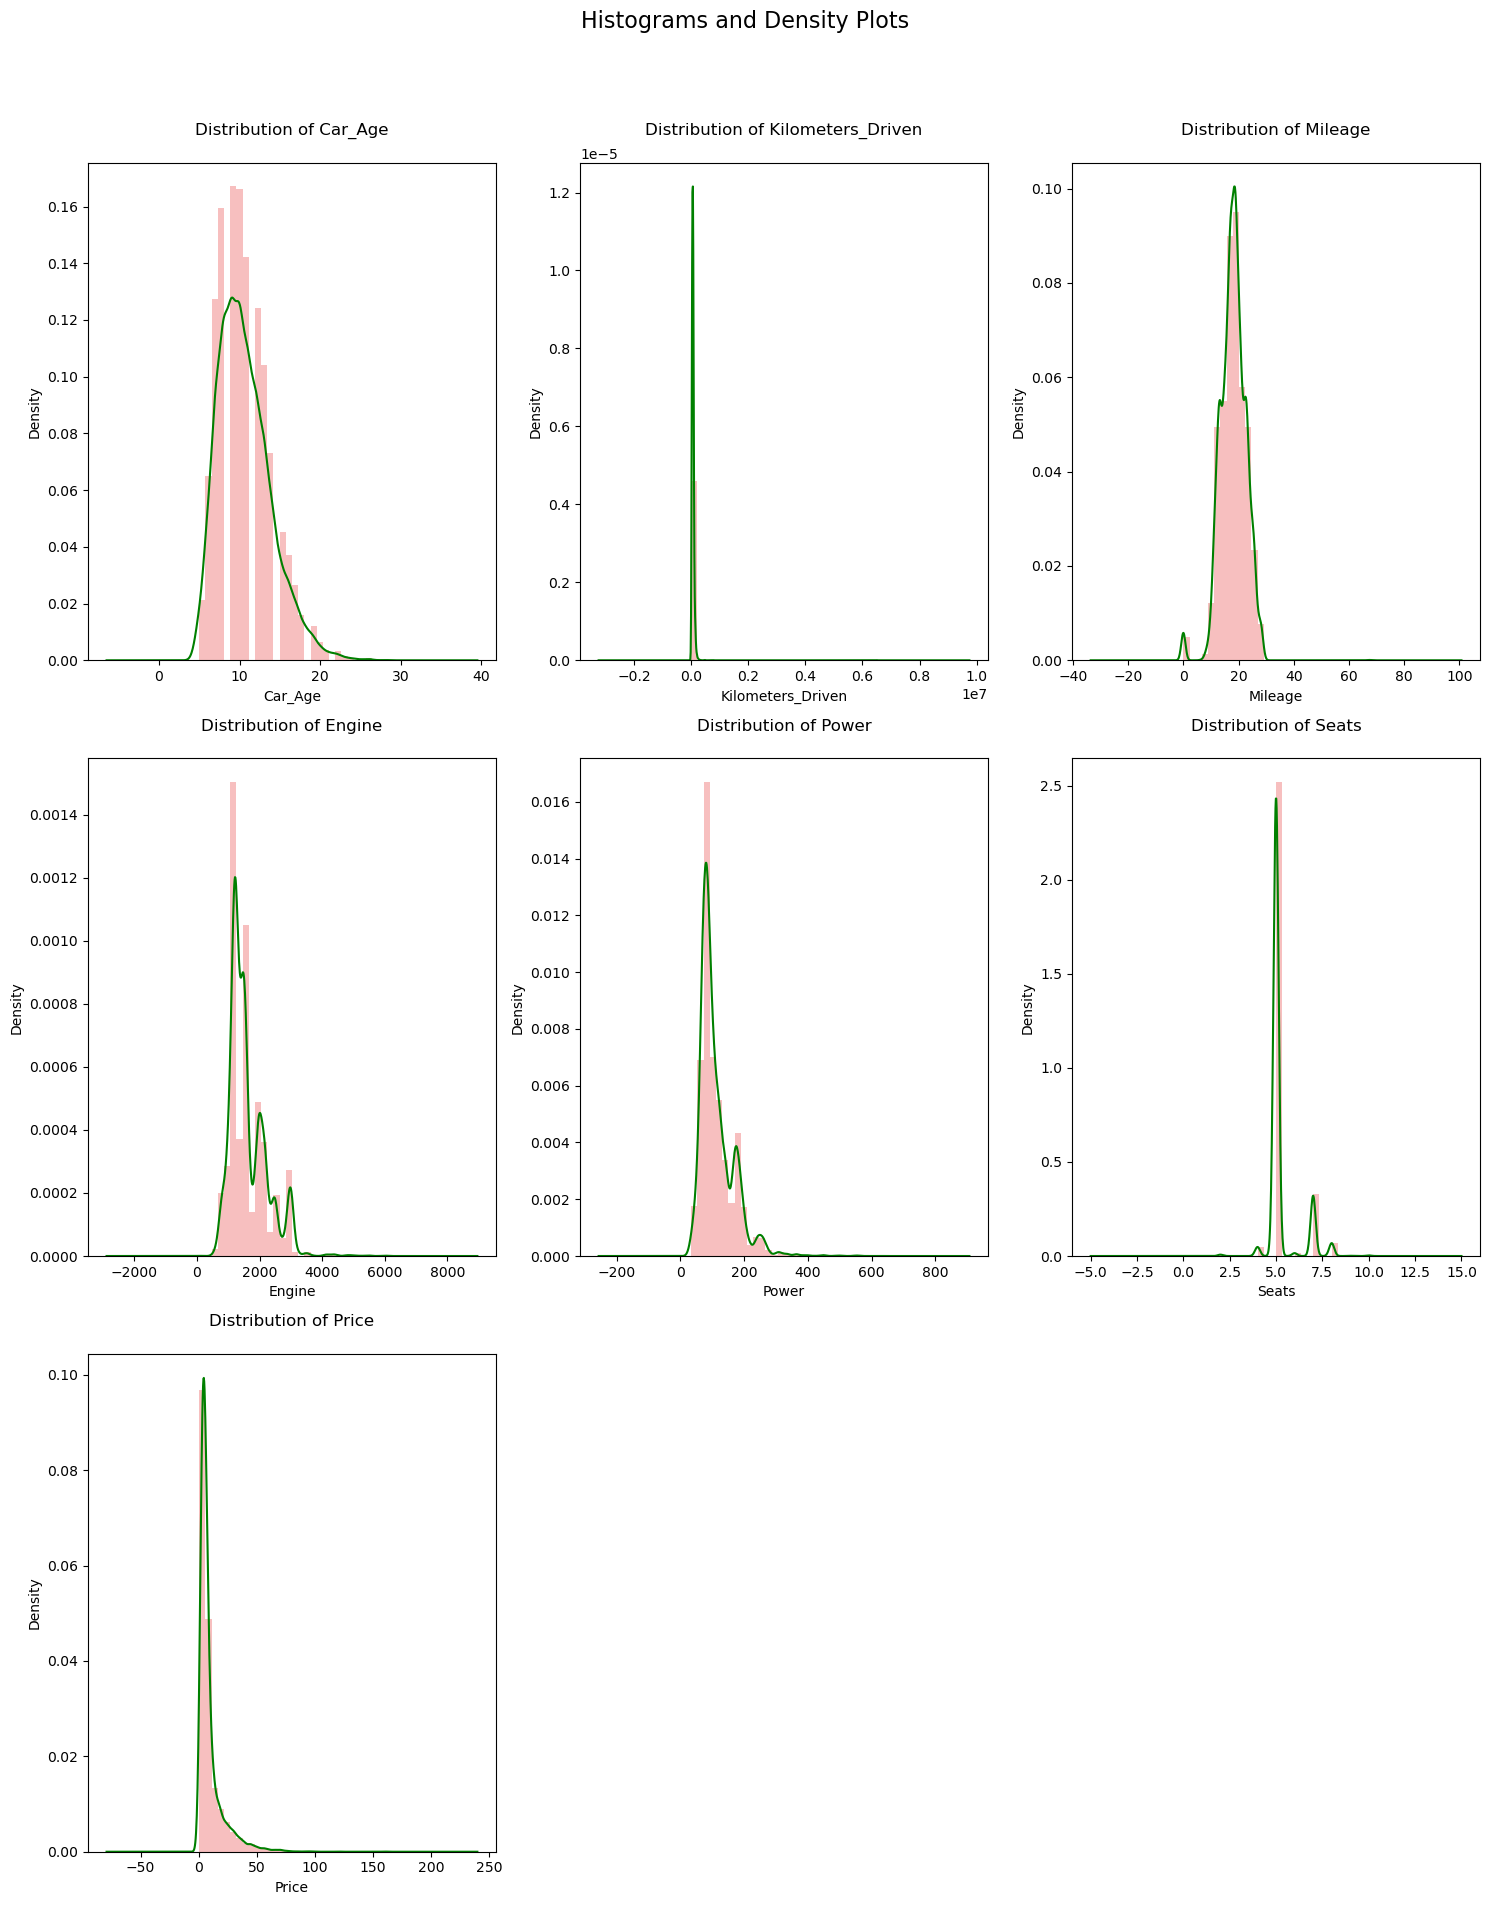

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
fig.suptitle('Histograms and Density Plots', fontsize=16)
for i, col in enumerate(numerical_columns):
    ax = axes[i // 3, i % 3]
    df_new[col].plot(kind='hist', bins=30, alpha=0.5, density=True, ax=ax, color='lightcoral')
    df_new[col].plot(kind='density', ax=ax, color='green')   
    ax.set_title(f'Distribution of {col}', pad=20)
    ax.set_xlabel(col)
# Hide the last 2 empty plots (axes[2, 1] and axes[2, 2])
axes[2, 1].axis('off')
axes[2, 2].axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Car_Age is right skewed distribution with range of age between 0 and 15 which are new cars. There are also few older cards upto 30-40 years which will be treated as outliers
- Kilometer driven is highly skewed with no spread majority at 0 which tells there are issue with data and the majority of vehicles are driven very less.
- Mileage shows slightly skewed close to normal distribution with mean around 20kmpl which might be the mileage of most of the cars. Some outliers are on both the sides .
- Engine(between 1000-2500cc) and power(most between 50 - 200bhp )are right skewed  with outliers that represents high performance cars. 
- Seats have sharp peaks most cars are 5 seater standard car. There is also 0 seats with needs attention in further analysis.
- Price is right skewed too with concetrated 0-20 lakhs. There are several outliers which might be luxury cars and few negatives tells its error and need attention
#### None of the feature is normally distributed

#### Based on the visualization none of the columns is normally distributed. We can futher confirm using Shapiro and D-Agostino's k^2 test

In [44]:
# Checking NaN values count for each column to check the normal distribution using shapiro
nan_counts = df_new[numerical_columns].isnull().sum()
print("NaN counts for numerical columns:")
print(nan_counts)

NaN counts for numerical columns:
Car_Age                 0
Kilometers_Driven       0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
Price                1234
dtype: int64


In [45]:
# checking distribution using shapiro
for col in numerical_columns:
    stat, p_value = stats.shapiro(df_new[col].dropna())
    print(f"Shapiro-Wilk Test for {col}:")
    print(f"Statistic: {stat}, p-value: {p_value:.2e}")  # Format p-value in scientific notation
    if p_value < 0.05:
        print(f"{col} does not appear to be normally distributed (Reject H₀)")
    else:
        print(f"{col} appears to be normally distributed (Fail to Reject H₀)")

Shapiro-Wilk Test for Car_Age:
Statistic: 0.9507344961166382, p-value: 5.75e-44
Car_Age does not appear to be normally distributed (Reject H₀)
Shapiro-Wilk Test for Kilometers_Driven:
Statistic: 0.19456708431243896, p-value: 0.00e+00
Kilometers_Driven does not appear to be normally distributed (Reject H₀)
Shapiro-Wilk Test for Mileage:
Statistic: 0.9645867347717285, p-value: 7.77e-39
Mileage does not appear to be normally distributed (Reject H₀)
Shapiro-Wilk Test for Engine:
Statistic: 0.8797816634178162, p-value: 0.00e+00
Engine does not appear to be normally distributed (Reject H₀)
Shapiro-Wilk Test for Power:
Statistic: 0.8419052958488464, p-value: 0.00e+00
Power does not appear to be normally distributed (Reject H₀)
Shapiro-Wilk Test for Seats:
Statistic: 0.4984499216079712, p-value: 0.00e+00
Seats does not appear to be normally distributed (Reject H₀)
Shapiro-Wilk Test for Price:
Statistic: 0.6406859159469604, p-value: 0.00e+00
Price does not appear to be normally distributed (Rej

/Users/monicalokare/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
#checking normality using D'Agostino's K-squared test
for col in numerical_columns:
    statistic, p_value = stats.normaltest(df_new[col].dropna())
    print(f"D'Agostino's K^2 test for {col}:")
    print(f"Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("Conclusion: ", "Normal" if p_value > 0.05 else "Not Normal")
    print()

D'Agostino's K^2 test for Car_Age:
Statistic: 780.3371
p-value: 0.0000
Conclusion:  Not Normal

D'Agostino's K^2 test for Kilometers_Driven:
Statistic: 24635.3349
p-value: 0.0000
Conclusion:  Not Normal

D'Agostino's K^2 test for Mileage:
Statistic: 715.2228
p-value: 0.0000
Conclusion:  Not Normal

D'Agostino's K^2 test for Engine:
Statistic: 1931.0265
p-value: 0.0000
Conclusion:  Not Normal

D'Agostino's K^2 test for Power:
Statistic: 3053.5378
p-value: 0.0000
Conclusion:  Not Normal

D'Agostino's K^2 test for Seats:
Statistic: 2766.8013
p-value: 0.0000
Conclusion:  Not Normal

D'Agostino's K^2 test for Price:
Statistic: 4386.3652
p-value: 0.0000
Conclusion:  Not Normal



#### The statistical test to check distributions operates on the data array passed to it. If the array contains NaN values, the test will fail or produce incorrect results.Hence dropna() is used in the stats.normaltest(df_nan_dropped[col].dropna()) it doesn't affect the original DataFrame.

#### All the distributions for numerical columns are not normally distributed hence I'm using lower limit and upper limit formula for calculating outliers

#### b) Detect outliers based on the data distribution type. For outlier detection, Calculate step by step.  Count(print) how many outliers for each column.

In [50]:
outlier_counts = {}
for col in numerical_columns:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df_new[(df_new[col] < lower_limit) | (df_new[col] > upper_limit)]
    outlier_count = len(outliers)
    print(f"Outliers in {col}:")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower limit: {lower_limit}")
    print(f"  Upper limit: {upper_limit}")
    print(f"  Number of outliers: {outlier_count}")
    print()

Outliers in Car_Age:
  Q1: 8.0
  Q3: 13.0
  IQR: 5.0
  Lower limit: 0.5
  Upper limit: 20.5
  Number of outliers: 58

Outliers in Kilometers_Driven:
  Q1: 34000.0
  Q3: 73000.0
  IQR: 39000.0
  Lower limit: -24500.0
  Upper limit: 131500.0
  Number of outliers: 258

Outliers in Mileage:
  Q1: 15.1
  Q3: 21.03
  IQR: 5.9300000000000015
  Lower limit: 6.2049999999999965
  Upper limit: 29.925000000000004
  Number of outliers: 82

Outliers in Engine:
  Q1: 1198.0
  Q3: 1968.0
  IQR: 770.0
  Lower limit: 43.0
  Upper limit: 3123.0
  Number of outliers: 65

Outliers in Power:
  Q1: 75.0
  Q3: 138.1
  IQR: 63.099999999999994
  Lower limit: -19.64999999999999
  Upper limit: 232.75
  Number of outliers: 273

Outliers in Seats:
  Q1: 5.0
  Q3: 5.0
  IQR: 0.0
  Lower limit: 5.0
  Upper limit: 5.0
  Number of outliers: 1153

Outliers in Price:
  Q1: 3.5
  Q3: 9.95
  IQR: 6.449999999999999
  Lower limit: -6.174999999999999
  Upper limit: 19.625
  Number of outliers: 718



#### There are several outliers in kilometer drive , power and price which tells that there might be rare case or error in the data which needs attention.Seats majority value is 5 and any deviation will be considered as outliers.Power and price has negative values which needs more attention and cleaning. 

In [52]:
# Checking the scale of numerical columns by displaying basic statistics
print(df_new[['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']].describe())

           Car_Age  Kilometers_Driven      Mileage       Engine        Power  \
count  7253.000000       7.253000e+03  7253.000000  7207.000000  7078.000000   
mean     10.634634       5.869906e+04    18.077906  1616.573470   112.765214   
std       3.254421       8.442772e+04     4.531764   595.285137    53.493553   
min       5.000000       1.710000e+02     0.000000    72.000000    34.200000   
25%       8.000000       3.400000e+04    15.100000  1198.000000    75.000000   
50%      10.000000       5.341600e+04    18.150000  1493.000000    94.000000   
75%      13.000000       7.300000e+04    21.030000  1968.000000   138.100000   
max      28.000000       6.500000e+06    67.195000  5998.000000   616.000000   

             Seats        Price  
count  7200.000000  6019.000000  
mean      5.279722     9.479468  
std       0.811660    11.187917  
min       0.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.640000  
75%       5.000000     9.950000  
max    

#### Basic statistical analysis to understand more about feature which will help in making decision on how to preprocess and clean the data

#### c)Draw box-plot together if the scales of the columns are in similar range. Otherwise, please draw box-plot separately.

Based on the statistical analysis
- Car_age, seats and mileage have a similar range is almost close so plotting them together.
- Power(medium range), Price(smaller range than km driven plotted separately to avoid distortion), Km driven(Extremely large range) and Engine(large range) have different range than each others so plotting them separately 

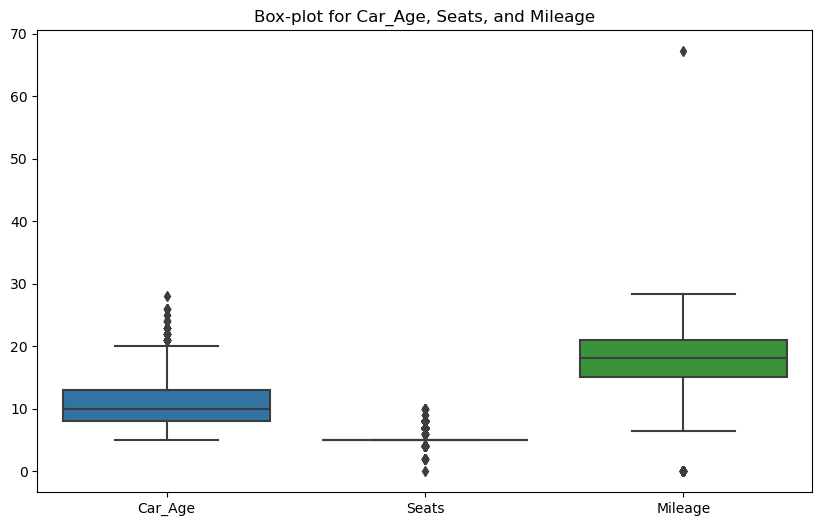

In [56]:
# Box-plot for columns with similar range (Car_Age, Seats, Mileage)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new[['Car_Age', 'Seats', 'Mileage']])
plt.title("Box-plot for Car_Age, Seats, and Mileage")
plt.show()

#### Mileage has outliers mostly aroung 0 and above 66 .For Seats everything except 5 is considered as outliers and car_age has outliers above 20 years.There is 0 in mileage this will be treated later in step 5. 

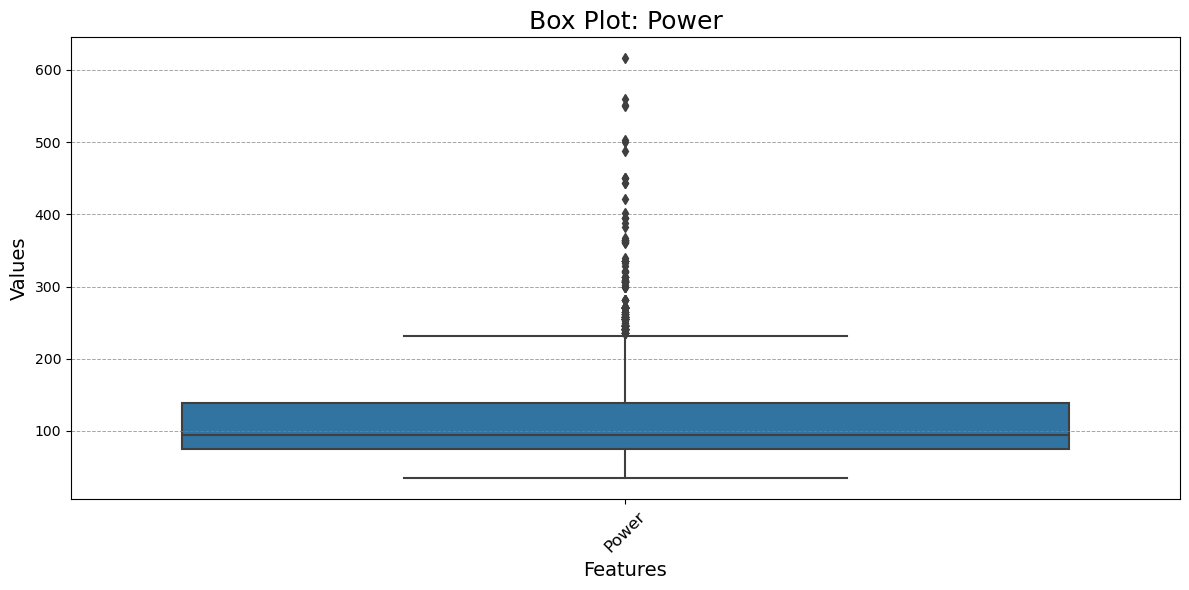

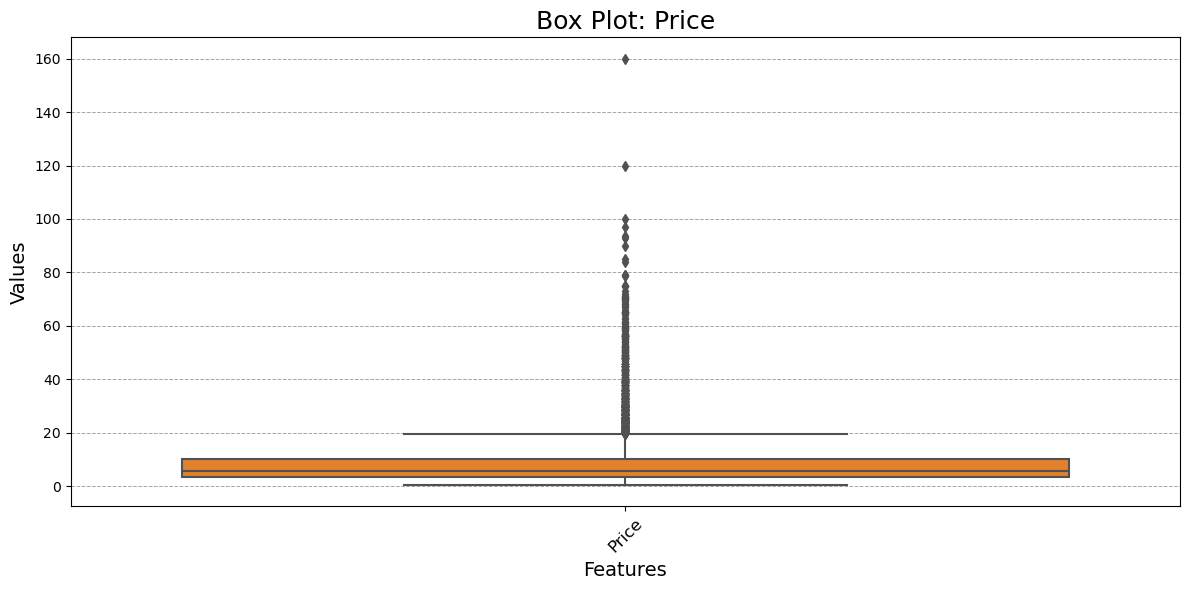

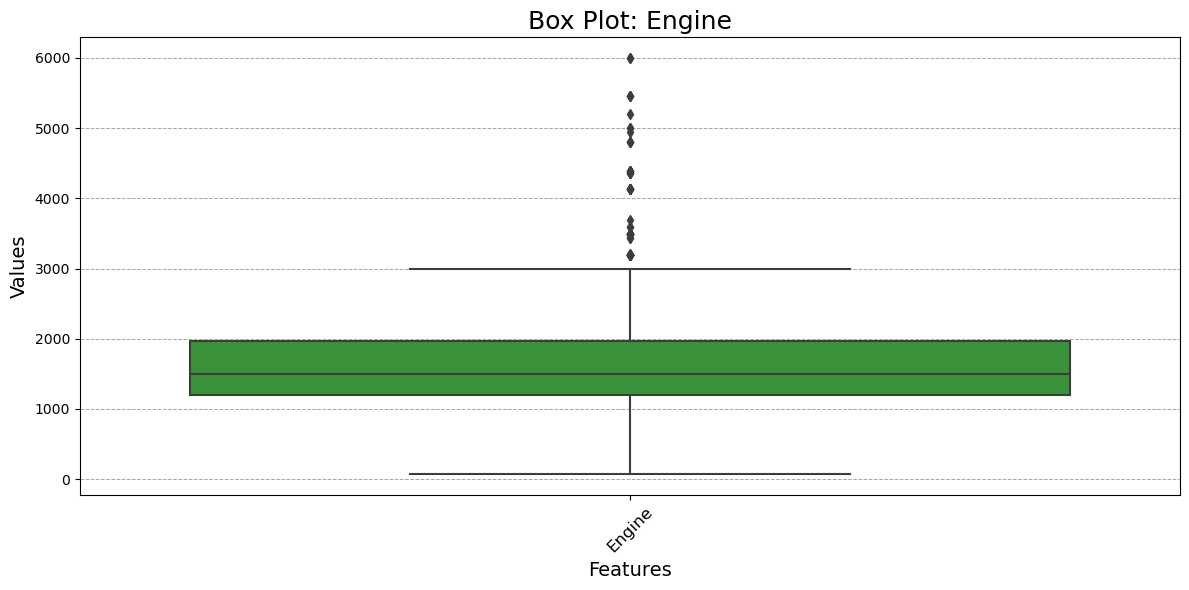

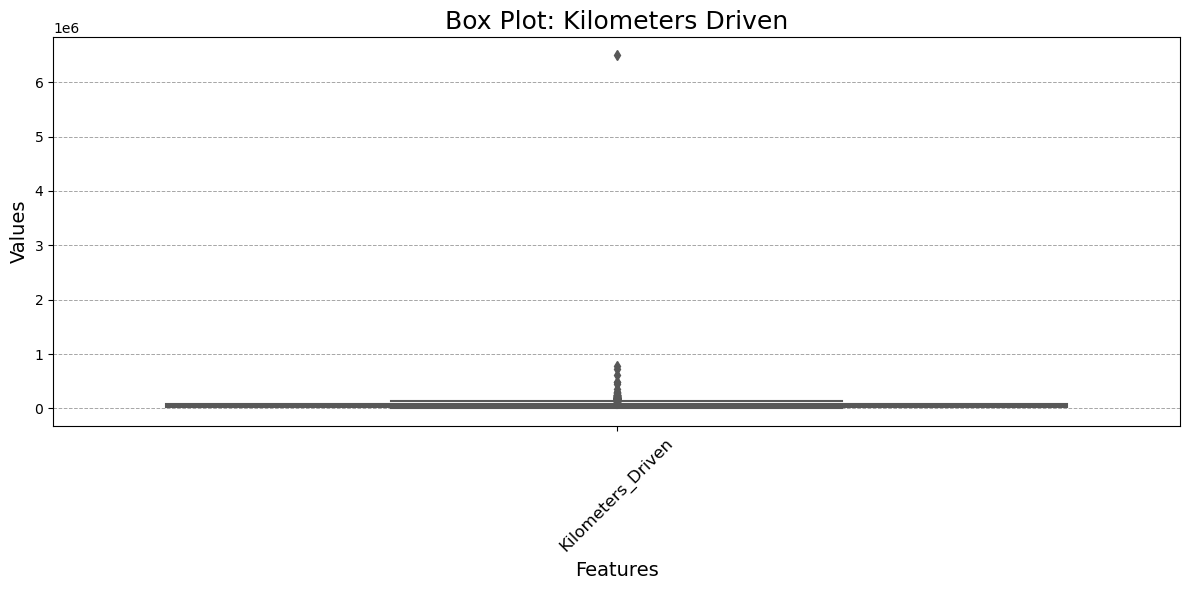

In [58]:
#Creating box plot based on scales
def create_boxplot(data, columns, title, palette):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[columns], palette=palette, showfliers=True)
    plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
    plt.title(title, fontsize=18)
    plt.xticks(rotation=45, fontsize=12)
    plt.ylabel('Values', fontsize=14)
    plt.xlabel('Features', fontsize=14)
    plt.tight_layout()
    plt.show()

# Grouping by scale
medium_scale1 = ['Power']
medium_scale2 = ['Price']
large_scale = ['Engine']
very_large_scale = ['Kilometers_Driven']

# Define color palettes for each plot 
palette_medium = ['#1f77b4', '#ff7f0e']  
palette_large = ['#2ca02c', '#d62728']  
palette_very_large = ['#9467bd', '#8c564b']

# Creating the enhanced box plots with different colors and gridlines
create_boxplot(df_new, medium_scale1, "Box Plot: Power", ['#1f77b4'])
create_boxplot(df_new, medium_scale2, "Box Plot: Price", ['#ff7f0e'])
create_boxplot(df_new, large_scale, "Box Plot: Engine", ['#2ca02c'])
create_boxplot(df_new, very_large_scale, "Box Plot: Kilometers Driven", ['#9467bd'])


#### Power anything above 220 is considering as outliers and there are few extreme values suggesting high power vehicle. Price above 20 lakh is outliers abd extreme values suggest high end cars. Similarly for engine above 3000 as extreme as 6000 is outliers suggesting highly powerful engines. The bulk of the data are from first quartile to the third quartile which tells that most vehicles have been driven fewer kilometers.

#### d) Please draw box-plot for ‘Mileage’ with ‘Fuel_Type’.

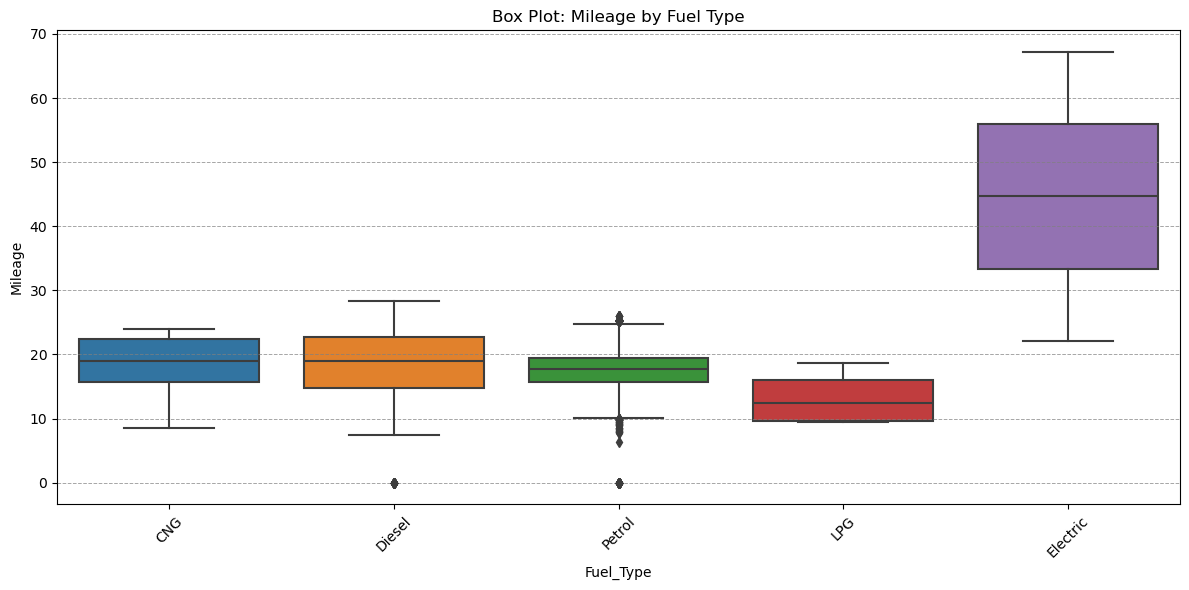

In [61]:
# Box plot for Mileage vs Fuel Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Mileage', data=df_new)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.title("Box Plot: Mileage by Fuel Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Most vehicles are around 20kmpl IQR is around 15 to 25 kmpl with no outliers indicating constant performance for CNG. For Diesel there is a consistant mileage median around 20 kmpl and IQR same as CNG with few outliers are lower end. Petrol has wider distribution than diesel and cng outliers on both the ends indicating less efficient and more efficent cars in the dataset. LPG has small range compared to other fuel type with no extreme outliers. Electric vehicle has IQR between 30 and 50kmpl and hightest mileage around 70kmpl which is valid given it's high efficiency since it's an electric car.

### 4. Pearson correlation coefficient and scatter plot

#### a) Before calculating the coefficient, you need to exclude the outliers.

In [65]:
df_no_outliers = df_new.copy()

In [66]:
# Function to remove outliers 
def remove_outliers(df, column):
    #dropping nan values first
    data = df[column].dropna()
    #calculating the outliers range
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Print the number of rows before outlier removal
    initial_row_count = df.shape[0]
    print(f"\nNumber of rows before outlier removal for '{column}': {initial_row_count}")
    
    # Remove outliers
    cleaned_data = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    # Calculate the number of rows after outlier removal
    final_row_count = cleaned_data.shape[0]
    outliers_count = initial_row_count - final_row_count
    print(f"\nAfter outlier removal for '{column}':")
    print(f"Lower limit: {lower_limit}\nUpper limit: {upper_limit}")
    print(f"Number of rows after removing outliers: {cleaned_data.shape[0]}")
    print(f"Number of outliers removed:{outliers_count}")
    return cleaned_data 

# Loop through each column and remove outliers
for col in numerical_columns:
    df_no_outliers = remove_outliers(df_no_outliers, col)


Number of rows before outlier removal for 'Car_Age': 7253

After outlier removal for 'Car_Age':
Lower limit: 0.5
Upper limit: 20.5
Number of rows after removing outliers: 7195
Number of outliers removed:58

Number of rows before outlier removal for 'Kilometers_Driven': 7195

After outlier removal for 'Kilometers_Driven':
Lower limit: -24831.75
Upper limit: 131510.25
Number of rows after removing outliers: 6945
Number of outliers removed:250

Number of rows before outlier removal for 'Mileage': 6945

After outlier removal for 'Mileage':
Lower limit: 6.85
Upper limit: 29.650000000000002
Number of rows after removing outliers: 6875
Number of outliers removed:70

Number of rows before outlier removal for 'Engine': 6875

After outlier removal for 'Engine':
Lower limit: 40.5
Upper limit: 3124.5
Number of rows after removing outliers: 6783
Number of outliers removed:92

Number of rows before outlier removal for 'Power': 6783

After outlier removal for 'Power':
Lower limit: -19.545
Upper limi

#### Created a copy of the main dataframe to avoid changes in main dataframe for further steps.Removing outliers and nan from Car_Age column makes the DataFrame to have fewer rows. When proceeded further to remove outliers from Kilometers_Driver the starting rows is smaller because the rows with outliers and nan in Car_Age are no longer present. Therefore the outlier counts in step 3 is different than step 4.

#### b) Calculate Pearson correlation coefficient between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’.

In [69]:
# Defining function to calculate Pearson correlation
def pearson_correlation(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))
    return numerator / denominator if denominator != 0 else 0
# To store the correlation values
correlation_dict = {}
for i, col1 in enumerate(numerical_columns):
    for col2 in numerical_columns[i+1:]:
        x = df_no_outliers[col1]
        y = df_no_outliers[col2]
        # Calculate Pearson correlation if both columns have the same number of non-NaN rows
        if len(x) == len(y):
            r = pearson_correlation(x, y)
            correlation_dict[(col1, col2)] = r
            print(f"Pearson correlation between {col1} and {col2}: {r}")

Pearson correlation between Car_Age and Kilometers_Driven: 0.5217438436186327
Pearson correlation between Car_Age and Mileage: -0.42927326477710087
Pearson correlation between Car_Age and Engine: 0.26646093925277303
Pearson correlation between Car_Age and Power: 0.17324570700423453
Pearson correlation between Car_Age and Seats: 0
Pearson correlation between Car_Age and Price: -0.44714348484924316
Pearson correlation between Kilometers_Driven and Mileage: -0.09217942950489008
Pearson correlation between Kilometers_Driven and Engine: 0.2569715247964071
Pearson correlation between Kilometers_Driven and Power: 0.14501992809565023
Pearson correlation between Kilometers_Driven and Seats: 0
Pearson correlation between Kilometers_Driven and Price: -0.20935096441284706
Pearson correlation between Mileage and Engine: -0.47232355226618256
Pearson correlation between Mileage and Power: -0.48265906518737295
Pearson correlation between Mileage and Seats: 0
Pearson correlation between Mileage and Pri

#### Creating a heatmap to visualize the pearson correlation between numerical columns. It will give a better understanding of the correlations between all pairs of features at once.

/Users/monicalokare/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


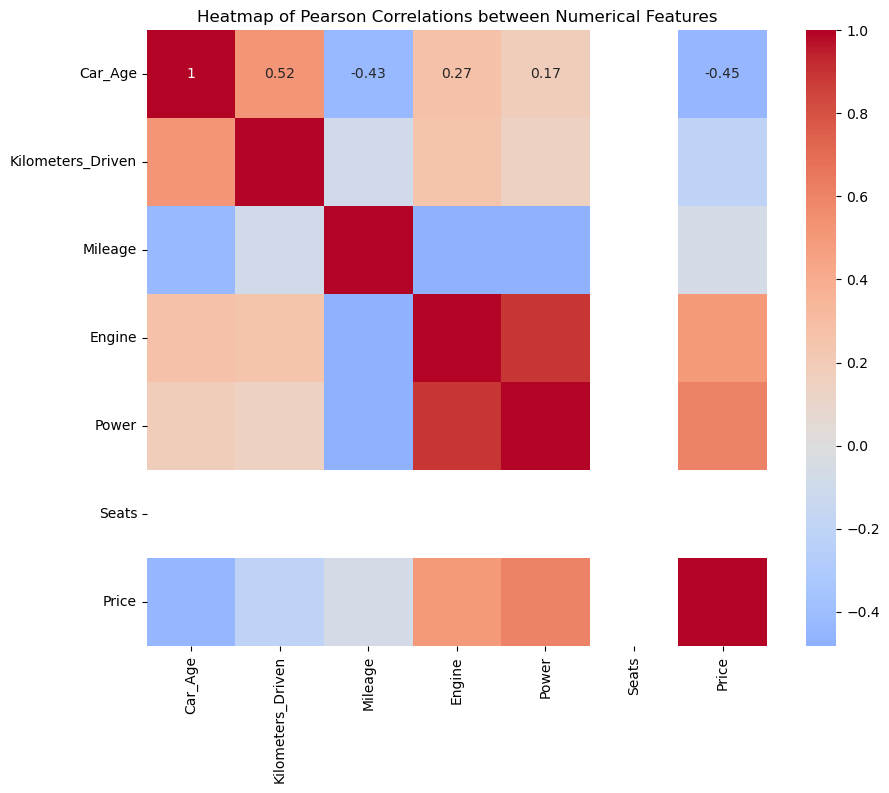

In [71]:
correlation_matrix = df_no_outliers[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Pearson Correlations between Numerical Features')
plt.show()

#### Based on the Pearson correlations 
- There is strong positive correlation between engine and power 0.89. Which implies than larger engines generate more power.
- There is moderate positive correlation between power and price 0.60. More power makes the car more expensive. Similarly, Price increases as engine size increases showing engine and price having moderate postive correlation 0.49. Car_age and Kilometers driven have 0.52 moderate postive correlation which tells that older the car more the kilometers driven.
- There is string negative correlation between car_age and price of -0.45 suggesting that older car price depreciates with time. Similar with Milage and engine size (-0.43) larger the enginer lower the fuel efficiency or mileage. Also mileage with power (-0.48) more powerful cars tend to have lower mileage.
- Kilometer driven and price have -0.21 weak negative correlation indicating that the more the kilometers driven by car may lead to depreciation of car price. Similarly with kilometers driven and mileage (-0.90) more kilometers driven leads to lower fuel efficiency.
- Seats and price have no correlation (0) which tells that seats have no influence on car price.
- This analysis will helps in understanding how different car features relate to each other which will help in machine learning models or further regression analysis aimed at predicting key outcomes like price or mileage.

#### c) Draw scatterplots between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please include the coefficient value inside of the figures.

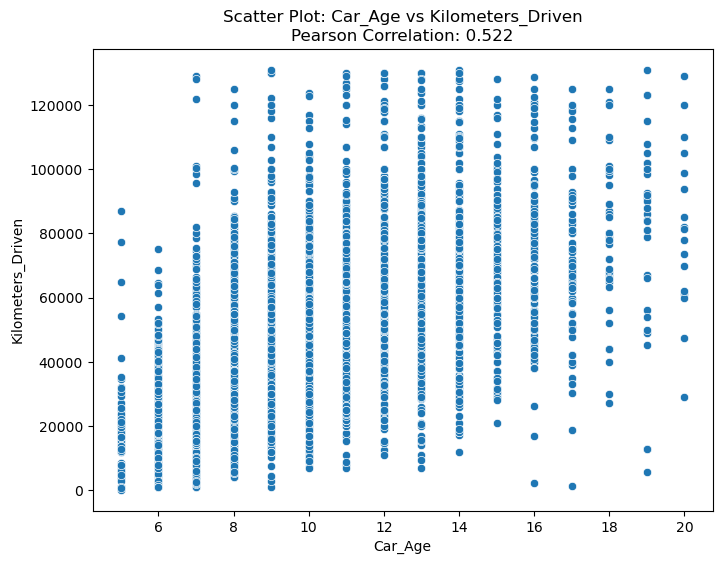

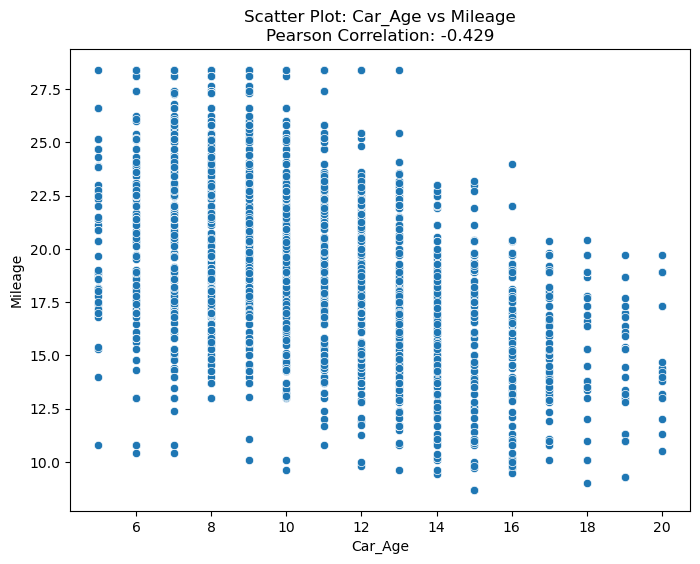

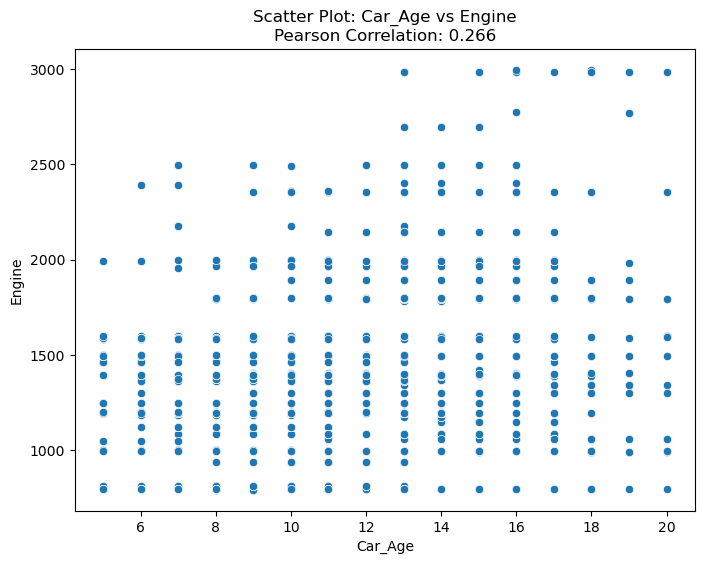

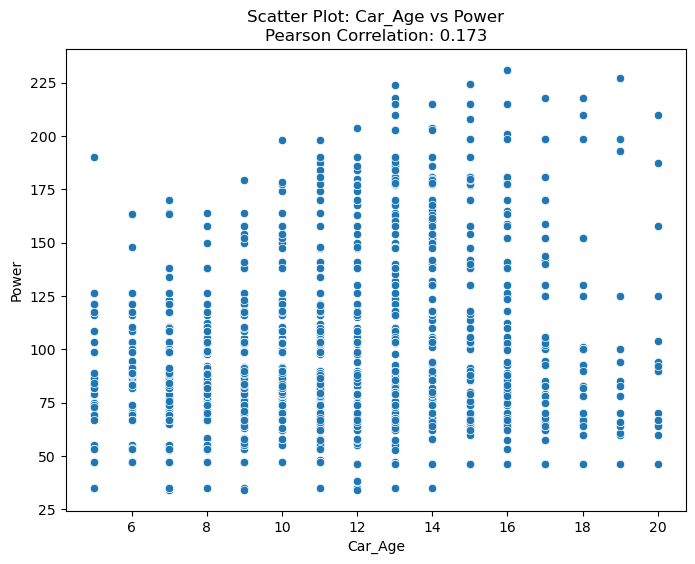

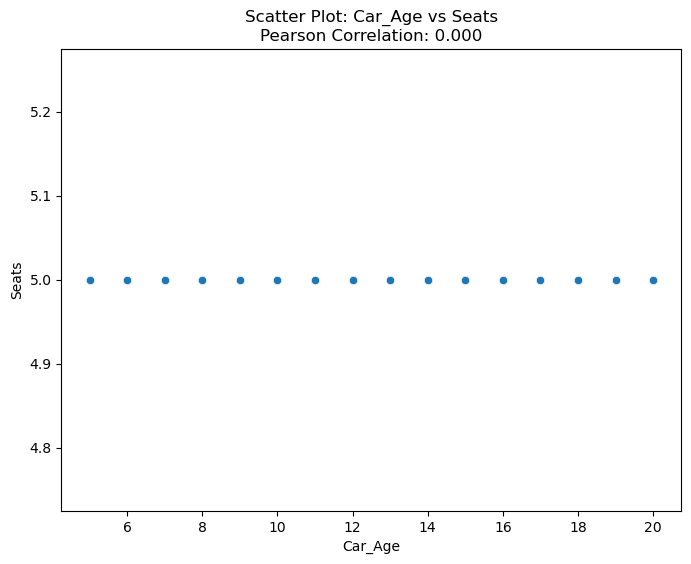

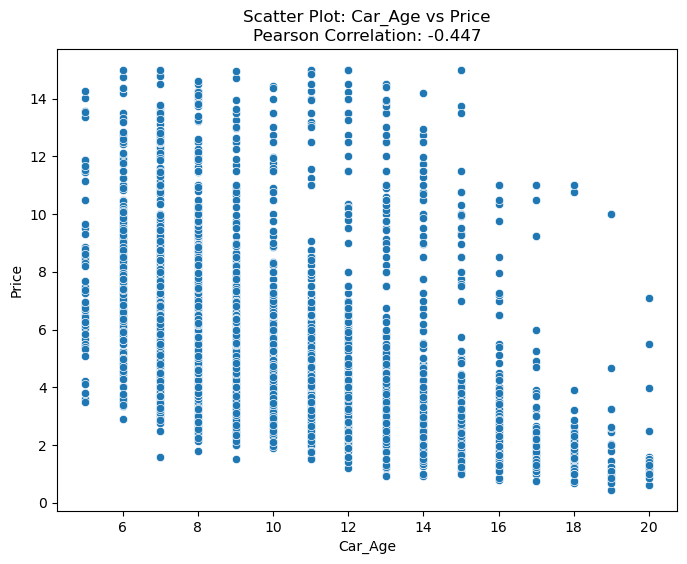

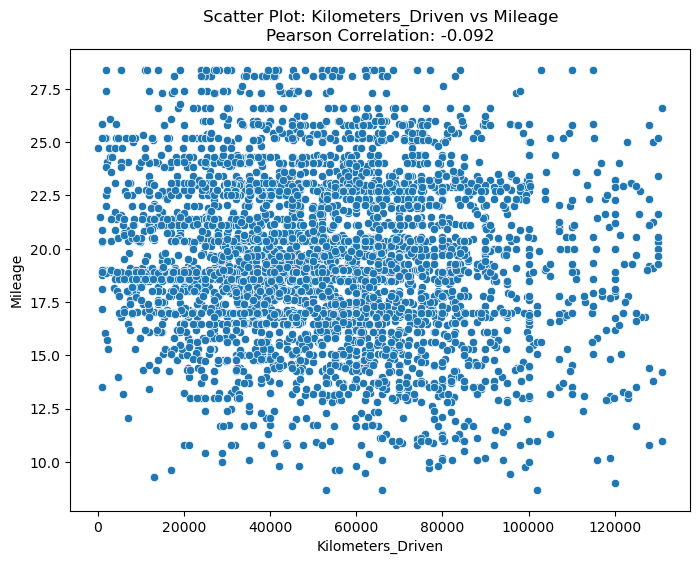

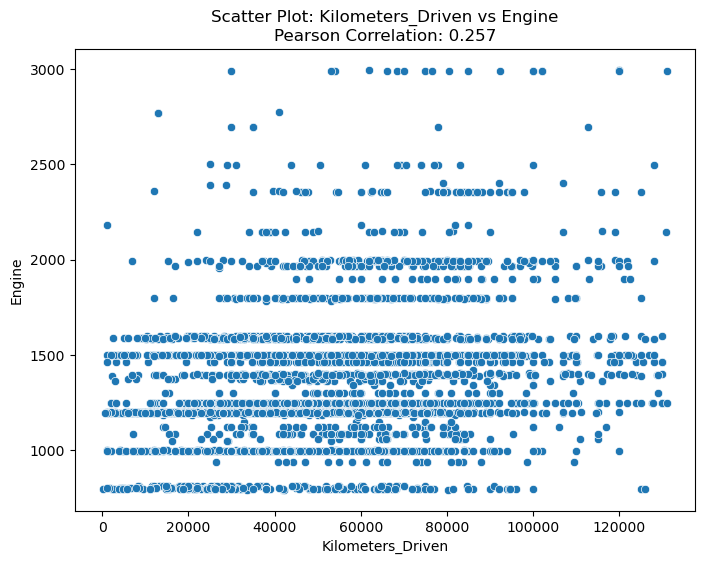

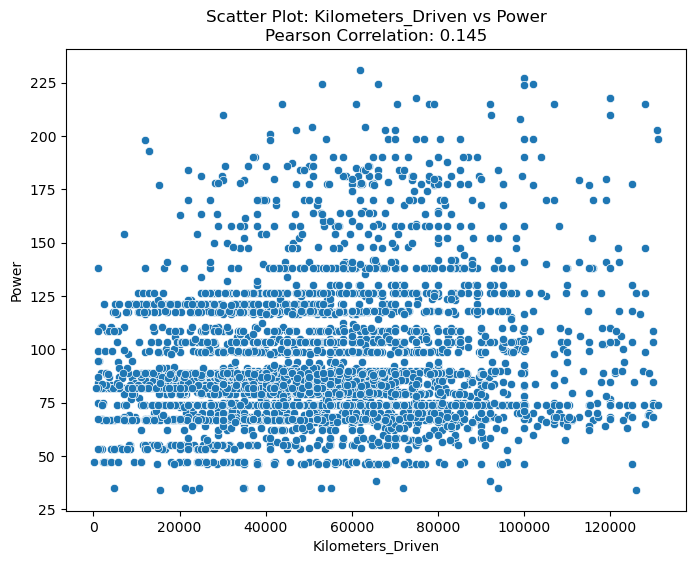

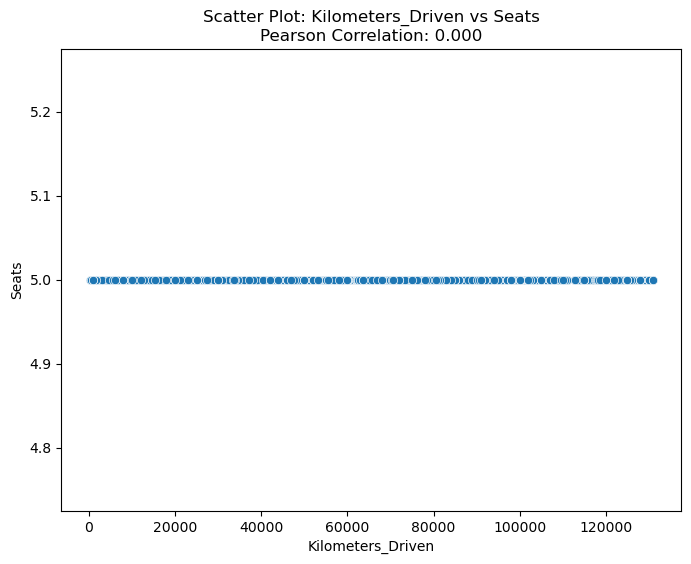

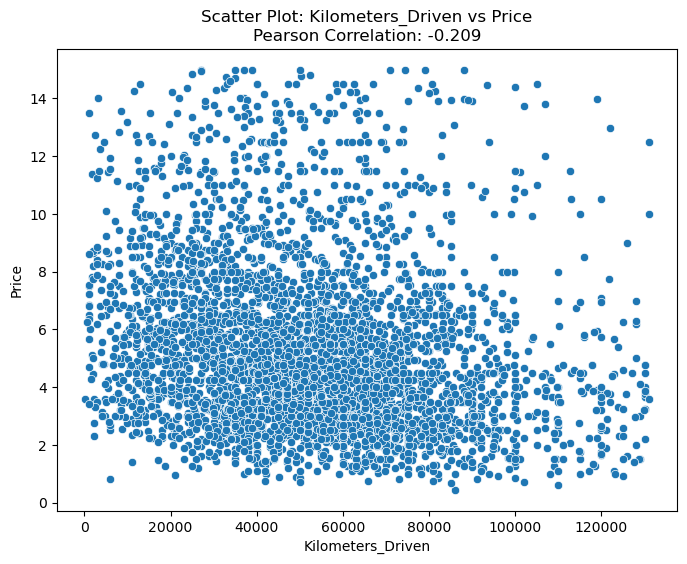

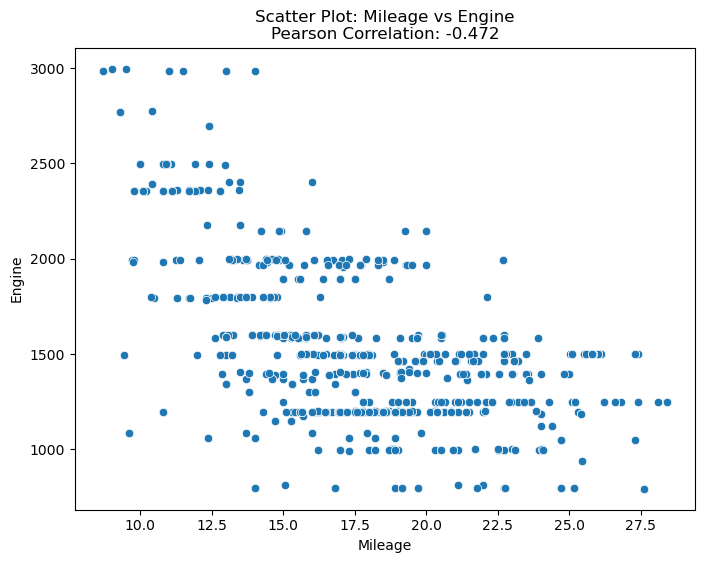

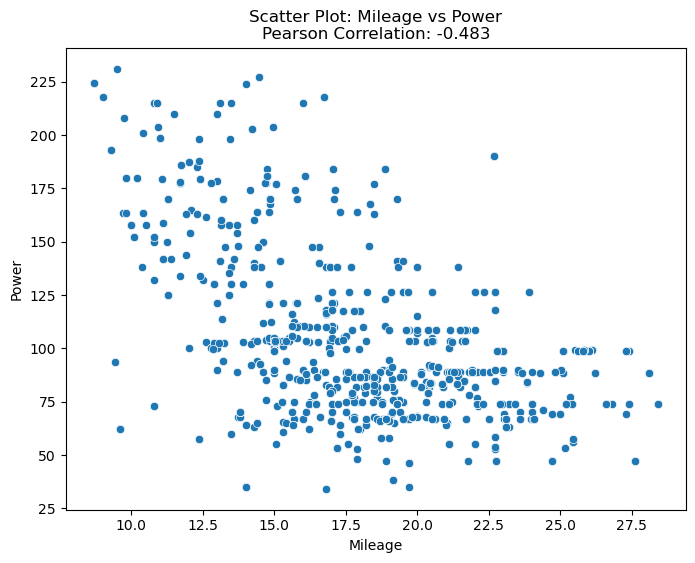

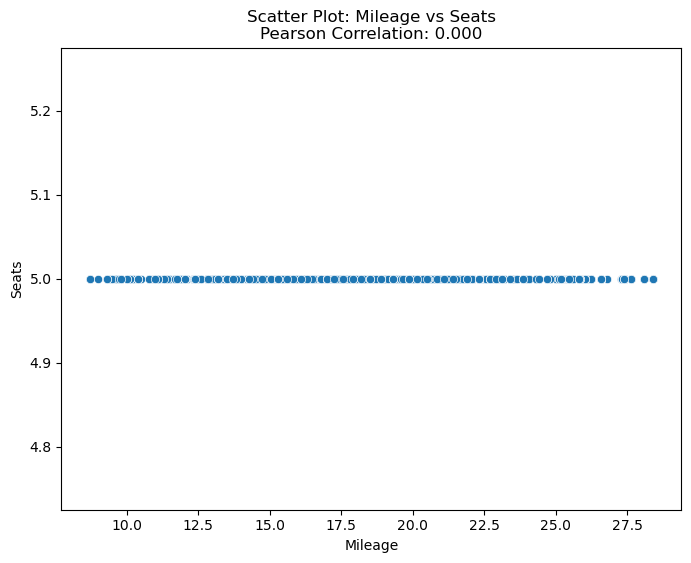

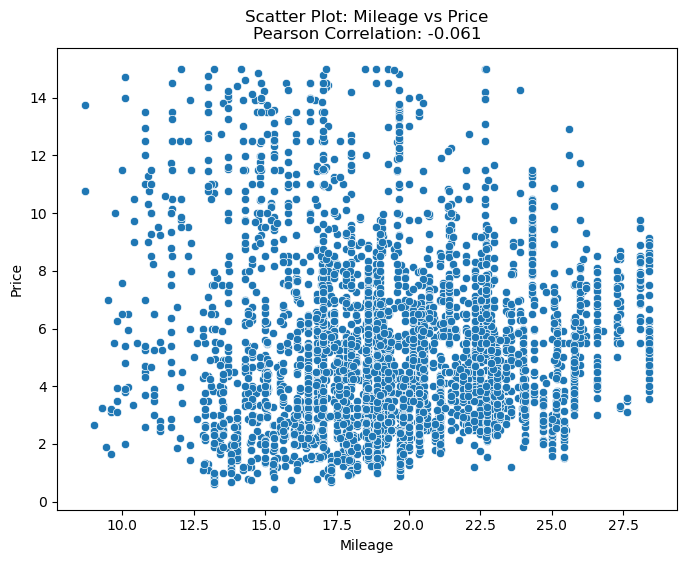

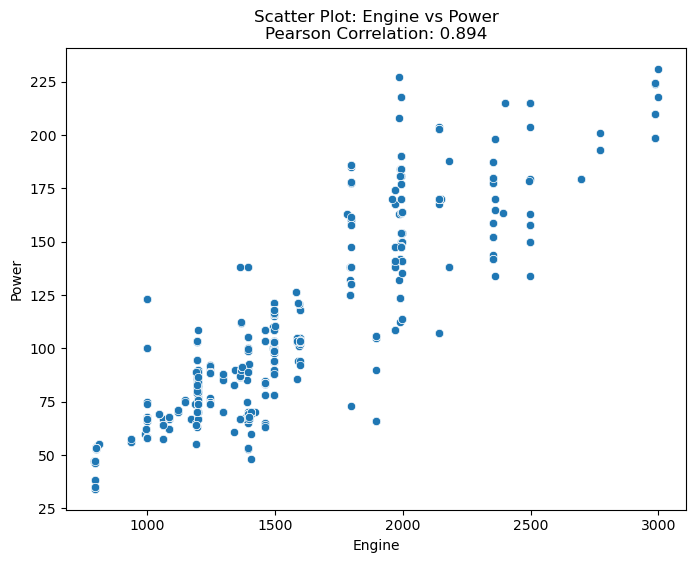

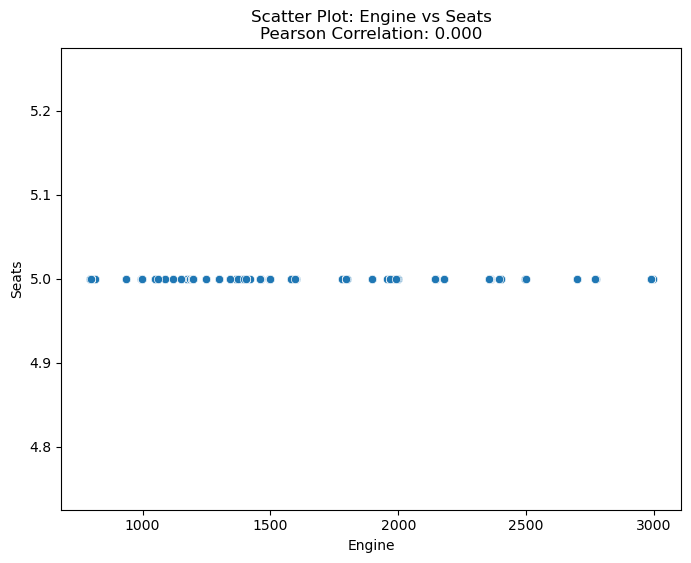

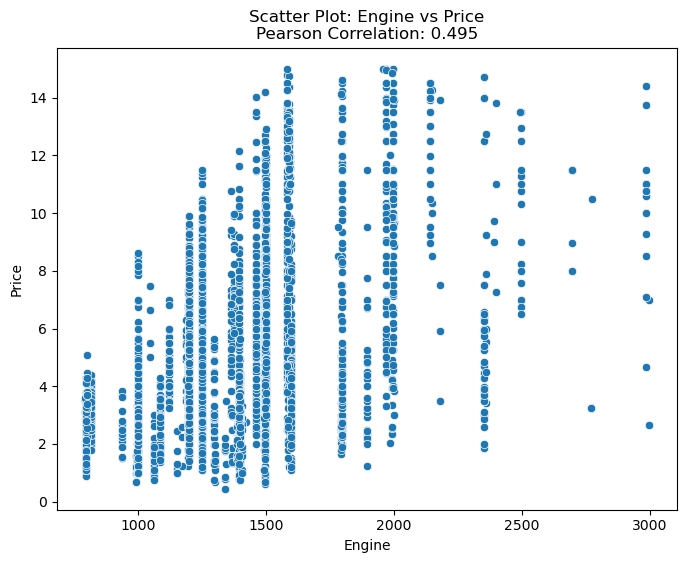

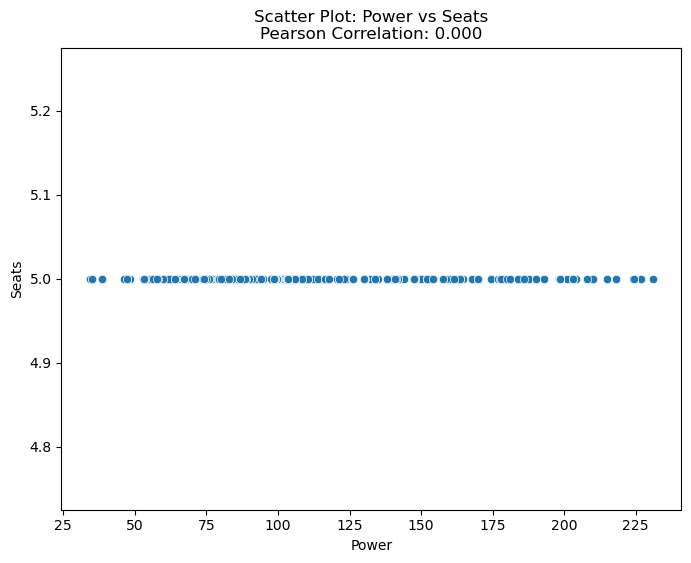

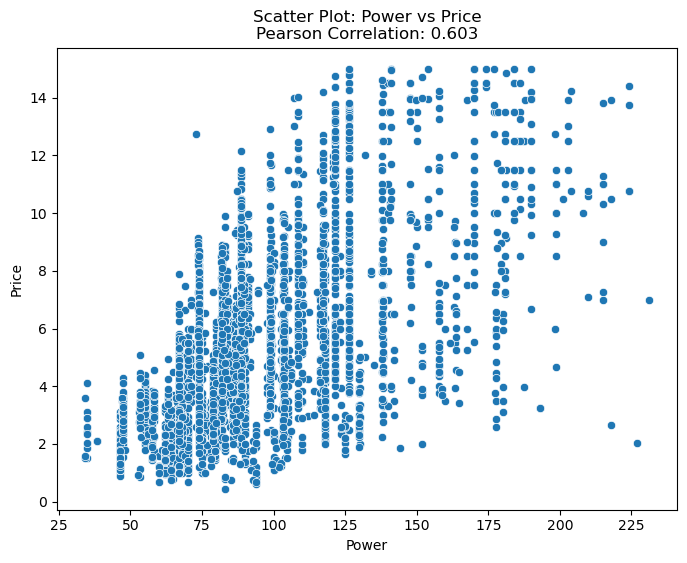

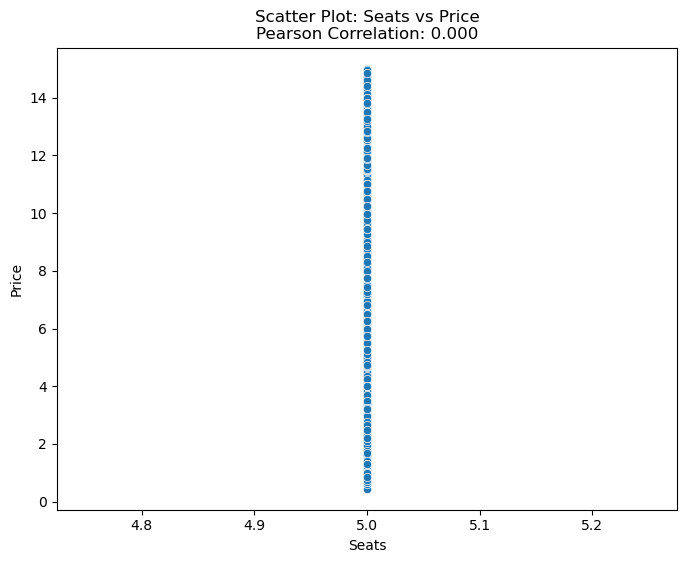

In [74]:
# Plotting scatter plots with Pearson correlation values in the title
for (col1, col2), r in correlation_dict.items():
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_no_outliers[col1], y=df_no_outliers[col2])
    plt.title(f'Scatter Plot: {col1} vs {col2}\nPearson Correlation: {r:.3f}', fontsize=12)
    plt.xlabel(col1, fontsize=10)
    plt.ylabel(col2, fontsize=10)
    plt.show()

### 5. Handling missing values

#### a)Treat the outliers also as missing values. Print missing values

In [77]:
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like")

In [78]:
#making a copy of dataframe before imputation
df_imputation = df_new.copy() 

In [79]:
df_imputation.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.00,998.0,58.16,5.0,1.75,14,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11,Audi,A4 New


In [80]:
# Replace any inf values with NaN(just in-case)
df_imputation.replace([np.inf, -np.inf], np.nan, inplace=True)

#Mark missing values before imputation
df_imputation['imputed_engine'] = df_imputation['Engine'].isnull()
df_imputation['imputed_power'] = df_imputation['Power'].isnull()
df_imputation['imputed_seats'] = df_imputation['Seats'].isnull()

In [81]:
missing_values_count = df_imputation[['Engine', 'Power', 'Seats']].isnull().sum()
print("Missing values excluding outliers before imputation:")
print(missing_values_count)

Missing values excluding outliers before imputation:
Engine     46
Power     175
Seats      53
dtype: int64


In [82]:
# Creating function to treat outliers as missing values and replace them with NaN
def treat_outliers_as_missing(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    outliers_count = len(outliers)
    df.loc[(df[column] < lower_limit) | (df[column] > upper_limit), column] = np.nan
    return outliers_count

outlier_columns = ['Engine', 'Power']
outlier_counts = {}
for col in outlier_columns:
    outlier_count = treat_outliers_as_missing(df_imputation, col)
    outlier_counts[col] = outlier_count

#Mark additional outliers treated as missing for each column
df_imputation['imputed_engine'] = df_imputation['imputed_engine'] | df_imputation['Engine'].isnull()
df_imputation['imputed_power'] = df_imputation['imputed_power'] | df_imputation['Power'].isnull()

total_missing_values_count = df_imputation[outlier_columns].isnull().sum()
print("\nSummary of Missing Values and Outliers:")
for col in outlier_columns:
    print(f"{col}:")
    print(f"  Original Missing Values: {missing_values_count[col]}")
    print(f"  Outliers treated as NaN: {outlier_counts[col]}")
    print(f"  Total Missing Values including outliers: {total_missing_values_count[col]}")
    print()


Summary of Missing Values and Outliers:
Engine:
  Original Missing Values: 46
  Outliers treated as NaN: 65
  Total Missing Values including outliers: 111

Power:
  Original Missing Values: 175
  Outliers treated as NaN: 273
  Total Missing Values including outliers: 448



#### I'm not calculating seats outliers which is a discrete feature only because they follow a standard pattern and there are no specific values as outliers unless there are obvious mistakes in the dataset (like a car having 0 seats) which i'm treating as nan and counting it as missing values

In [84]:
# Treat 0 values in 'Seats' as missing (NaN)
df_imputation.loc[df_imputation['Seats'] == 0, 'Seats'] = np.nan

# Now check for all missing values
missing_values_count = df_imputation[['Engine', 'Power', 'Seats']].isnull().sum()
print("Missing values before imputation:")
print(missing_values_count)

Missing values before imputation:
Engine    111
Power     448
Seats      54
dtype: int64


#### b) Impute the missing values in columns of ‘Engine’, ‘Power’, and ‘Seats' based on subclass (subgroups).

#### I have already extracted brand and manufacturer in step 1. Using brand and model as subclass imputation

In [87]:
# Function to impute missing values based on the subclass (Brand, Model initially)
def impute_missing_values(df, column, subclass_columns, method='mean'):
    for subclass in df.groupby(subclass_columns):
        index = subclass[1].index
        if method == 'mean':
            value = df.loc[index, column].mean()
        elif method == 'mode':
            value = df.loc[index, column].mode()[0] if not df.loc[index, column].mode().empty else np.nan
        df.loc[index, column] = df.loc[index, column].fillna(value)

print(f"\nMissing values for 'Seats' before imputation: {df_imputation['Seats'].isnull().sum()}")
impute_missing_values(df_imputation, 'Seats', ['Brand', 'Model'], method='mode')
print(f"Missing values for 'Seats' after subclass-based imputation: {df_imputation['Seats'].isnull().sum()}")

print(f"\nMissing values for 'Engine' before imputation: {df_imputation['Engine'].isnull().sum()}")
impute_missing_values(df_imputation, 'Engine', ['Brand', 'Model'], method='mean')
print(f"Missing values for 'Engine' after subclass-based imputation: {df_imputation['Engine'].isnull().sum()}")

print(f"\nMissing values for 'Power' before imputation: {df_imputation['Power'].isnull().sum()}")
impute_missing_values(df_imputation, 'Power', ['Brand', 'Model'], method='mean')
print(f"Missing values for 'Power' after subclass-based imputation: {df_imputation['Power'].isnull().sum()}")


Missing values for 'Seats' before imputation: 54
Missing values for 'Seats' after subclass-based imputation: 23

Missing values for 'Engine' before imputation: 111
Missing values for 'Engine' after subclass-based imputation: 62

Missing values for 'Power' before imputation: 448
Missing values for 'Power' after subclass-based imputation: 273


#### Checking for more details in missing values 

In [89]:
df_imputation[df_imputation['Seats'].isnull()==True].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model,imputed_engine,imputed_power,imputed_seats
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,2.11,14,Maruti,Swift 1.3,True,True,True
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,1.75,18,Maruti,Swift 1.3,True,True,True
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,5.80,9,Maruti,Swift 1.3,True,True,True
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,NaN,3.15,13,Maruti,Swift 1.3,True,True,True
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1,NaN,NaN,NaN,4.70,9,Maruti,Swift 1.3,True,True,True
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,NaN,NaN,NaN,1.75,17,Maruti,Swift 1.3,True,True,True
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,1.50,16,Maruti,Estilo LXI,False,True,True
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,NaN,NaN,NaN,4.24,10,Maruti,Swift 1.3,True,True,True
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,NaN,2.35,18,Maruti,Swift 1.3,True,True,True
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,NaN,NaN,NaN,11.99,11,Honda,CR-V AT,True,True,True


#### Most of them are 5 seater type of a car so filling it with global mode 
https://www.cardekho.com/overview/Maruti_Wagon_R/Maruti_Wagon_R_LXI.htm#leadForm; https://www.cardekho.com/overview/Maruti_Swift/Maruti_Swift_VXi.htm

In [91]:
# Imputing any remaining missing values in categorical columns using global mode
categorical_columns = ['Seats']
for col in categorical_columns:
    df_imputation[col] = df_imputation[col].fillna(df_imputation[col].mode()[0])

In [92]:
print(df_imputation['Seats'].isnull().sum())

0


#### Will impute Engine and Power by checking if there is any subclass that gives more detailed view of values

In [94]:
print(df_imputation.groupby(['Brand','Model'])['Engine'].mean().head(10))
grouped_unique_values = df_imputation.groupby(['Brand','Model'])['Engine'].nunique()
print(grouped_unique_values.head(10))

Brand       Model       
Ambassador  Classic Nova    1489.000000
Audi        A3 35           1968.000000
            A4 1.8          1786.666667
            A4 2.0          1968.285714
            A4 3.0          2967.000000
            A4 3.2                  NaN
            A4 30           1395.000000
            A4 35           1968.000000
            A4 New          1968.000000
            A6 2.0          1968.000000
Name: Engine, dtype: float64
Brand       Model       
Ambassador  Classic Nova    1
Audi        A3 35           1
            A4 1.8          2
            A4 2.0          2
            A4 3.0          1
            A4 3.2          0
            A4 30           1
            A4 35           1
            A4 New          1
            A6 2.0          1
Name: Engine, dtype: int64


In [95]:
print(df_imputation.groupby(['Brand','Model','Year','Fuel_Type','Transmission'])['Engine'].mean().head(10))
grouped_unique_values = df_imputation.groupby(['Brand', 'Model', 'Year', 'Fuel_Type', 'Transmission'])['Engine'].nunique()
print(grouped_unique_values.head(10))

Brand       Model         Year  Fuel_Type  Transmission
Ambassador  Classic Nova  2003  Diesel     Manual          1489.0
Audi        A3 35         2014  Diesel     Automatic       1968.0
                          2015  Diesel     Automatic       1968.0
                          2016  Diesel     Automatic       1968.0
                          2017  Diesel     Automatic       1968.0
            A4 1.8        2010  Petrol     Automatic       1781.0
                          2011  Petrol     Automatic       1781.0
                          2012  Petrol     Automatic       1798.0
            A4 2.0        2009  Diesel     Automatic       1968.0
                          2010  Diesel     Automatic       1968.0
Name: Engine, dtype: float64
Brand       Model         Year  Fuel_Type  Transmission
Ambassador  Classic Nova  2003  Diesel     Manual          1
Audi        A3 35         2014  Diesel     Automatic       1
                          2015  Diesel     Automatic       1
                

#### Even after adding different sub groups the unique value count remains unchanged therefore trying single subclass like fuel_type since engine and power both depends on fuel_type it makes sense to use fuel_type as subclass mean to impute values.
https://senzahydrogen.com/the-relationship-and-function-of-displacement-horsepower-power-and-torque-in-automobile-engines/;


In [97]:
print(df_imputation.groupby(['Fuel_Type'])['Engine'].mean().head(10))
grouped_unique_values = df_imputation.groupby(['Fuel_Type'])['Engine'].nunique()
print(grouped_unique_values.head(10))

Fuel_Type
CNG         1083.403226
Diesel      1843.982818
Electric     935.000000
LPG         1069.166667
Petrol      1325.249692
Name: Engine, dtype: float64
Fuel_Type
CNG         10
Diesel      76
Electric     2
LPG          5
Petrol      93
Name: Engine, dtype: int64


#### Checking for power

In [99]:
print(f"\nMissing values for 'Engine' before imputation: {df_imputation['Engine'].isnull().sum()}")
impute_missing_values(df_imputation, 'Engine', ['Fuel_Type'], method='mean')
print(f"Missing values for 'Engine' after subclass-based imputation: {df_imputation['Engine'].isnull().sum()}")


Missing values for 'Engine' before imputation: 62
Missing values for 'Engine' after subclass-based imputation: 0


In [100]:
print(df_imputation.groupby(['Brand','Model'])['Power'].mean().head(10))
grouped_unique_values = df_imputation.groupby(['Brand','Model'])['Power'].nunique()
print(grouped_unique_values.head(10))

Brand       Model       
Ambassador  Classic Nova     35.500000
Audi        A3 35           143.000000
            A4 1.8          164.673333
            A4 2.0          155.815357
            A4 3.0                 NaN
            A4 3.2                 NaN
            A4 30           147.510000
            A4 35           180.196875
            A4 New          140.800000
            A6 2.0          187.740000
Name: Power, dtype: float64
Brand       Model       
Ambassador  Classic Nova    1
Audi        A3 35           1
            A4 1.8          2
            A4 2.0          4
            A4 3.0          0
            A4 3.2          0
            A4 30           1
            A4 35           2
            A4 New          1
            A6 2.0          1
Name: Power, dtype: int64


In [101]:
print(df_imputation.groupby(['Brand','Model','Year','Fuel_Type','Transmission'])['Power'].mean().head(10))
grouped_unique_values = df_imputation.groupby(['Brand', 'Model', 'Year', 'Fuel_Type', 'Transmission'])['Power'].nunique()
print(grouped_unique_values.head(10))

Brand       Model         Year  Fuel_Type  Transmission
Ambassador  Classic Nova  2003  Diesel     Manual           35.5000
Audi        A3 35         2014  Diesel     Automatic       143.0000
                          2015  Diesel     Automatic       143.0000
                          2016  Diesel     Automatic       143.0000
                          2017  Diesel     Automatic       143.0000
            A4 1.8        2010  Petrol     Automatic       163.2000
                          2011  Petrol     Automatic       163.2000
                          2012  Petrol     Automatic       167.6200
            A4 2.0        2009  Diesel     Automatic       145.6325
                          2010  Diesel     Automatic       140.0000
Name: Power, dtype: float64
Brand       Model         Year  Fuel_Type  Transmission
Ambassador  Classic Nova  2003  Diesel     Manual          1
Audi        A3 35         2014  Diesel     Automatic       1
                          2015  Diesel     Automatic      

In [102]:
print(f"\nMissing values for 'Power' before imputation: {df_imputation['Power'].isnull().sum()}")
impute_missing_values(df_imputation, 'Power', ['Fuel_Type'], method='mean')
print(f"Missing values for 'Power' after subclass-based imputation: {df_imputation['Power'].isnull().sum()}")


Missing values for 'Power' before imputation: 273
Missing values for 'Power' after subclass-based imputation: 0


#### Even after adding different sub groups the unique value count remains unchanged therefore fuel_type will be used for power. Just like engine , power depends on Fuel_Type https://carfromjapan.com/article/industry-knowledge/cc-and-horsepower-in-automobile-engine/

#### c) If imputing using a subclass or multiple subclasses does not impute all the missing values then impute using the global constant for the remaining rows.

### Skipping this step since all three columns missing values are imputed and no global mean is used 

In [112]:
# Global Imputation (mean for continuous columns, mode for categorical columns)
# Check missing values before global imputation
missing_values_before_global = df_imputation[['Engine', 'Power']].isnull().sum()
print("\nMissing values before global imputation:")
print(missing_values_before_global)

# Impute any remaining missing values in continuous columns using global mean
continuous_columns = ['Engine', 'Power']
for col in continuous_columns:
    df_imputation[col] = df_imputation[col].fillna(df_imputation[col].mean())


# Final check for missing values after global imputation
final_missing_values_count = df_imputation[['Engine', 'Power', 'Seats']].isnull().sum()
print("\nMissing values after global imputation:")
print(final_missing_values_count)



Missing values before global imputation:
Engine    0
Power     0
dtype: int64

Missing values after global imputation:
Engine    0
Power     0
Seats     0
dtype: int64


- Handled the missing values for categorical or discrete features like seats by imputing them using the mode for each subclass like ['Brand', 'Model']. 
- For continuous feature like Engine and Power imputed using the mean for each subclass like ['Brand', 'Model']. 
- Although engine is mentioned as whole number values by manufacturer, it is not discrete because it can theoretically take any value within a range and actual calculation of engine is mentioned in the below link https://www.carsguide.com.au/car-advice/engine-capacity-what-does-cc-mean-70785 
- Reason why we are imputing discrete (seats) with mode and continuous(enginer and power) with mean is because of the nature of the data and also because of the statistical measures that represent them.
    - Seats is a countable, discrete variable. we cannot have seats like 4.5 in form of fraction which is why we use mode i.e. most frequently occuring term.Using the mean (5.3 seats) of seats is unrealistic which don't make sense in reality.
    - Engine and power are continuous measurements which can take any value in the range including fractions hardly there will be any repeated values which is why mode is not used for continuous feature imputation. Mean values always provide a central tendency of balanced measure where data is speard across the range. Mean reflects the overall distribution of the data and it is also favourable when the extremme outliers are not very common as it gives the average of all the values.
- No missing values were remained after imputation using sub-class. For future use added global mode and mean to handle missing values

#### e) Draw histogram(distribution) for each column and use different color for the imputed missing values.

/Users/monicalokare/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


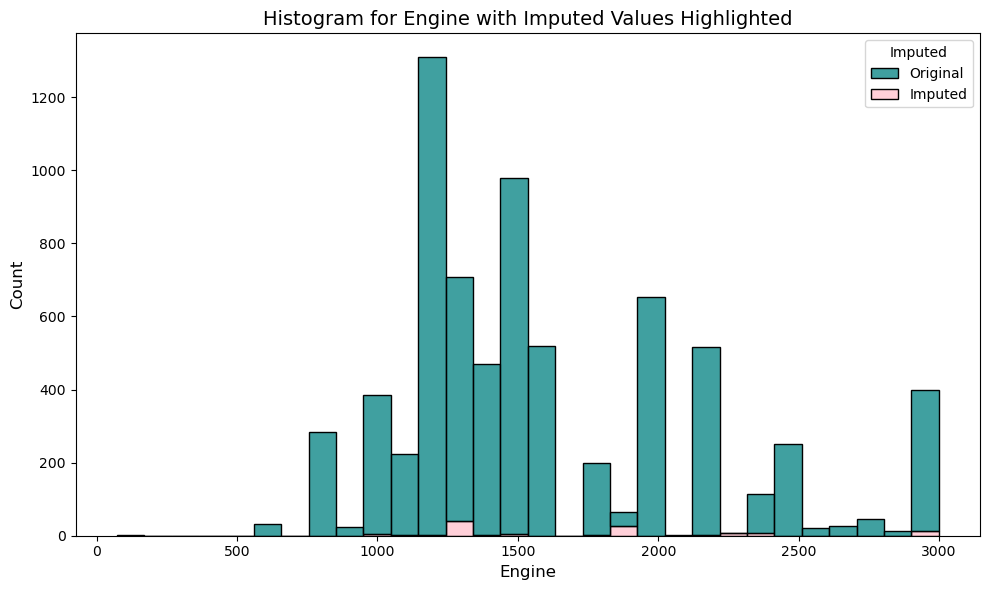

/Users/monicalokare/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


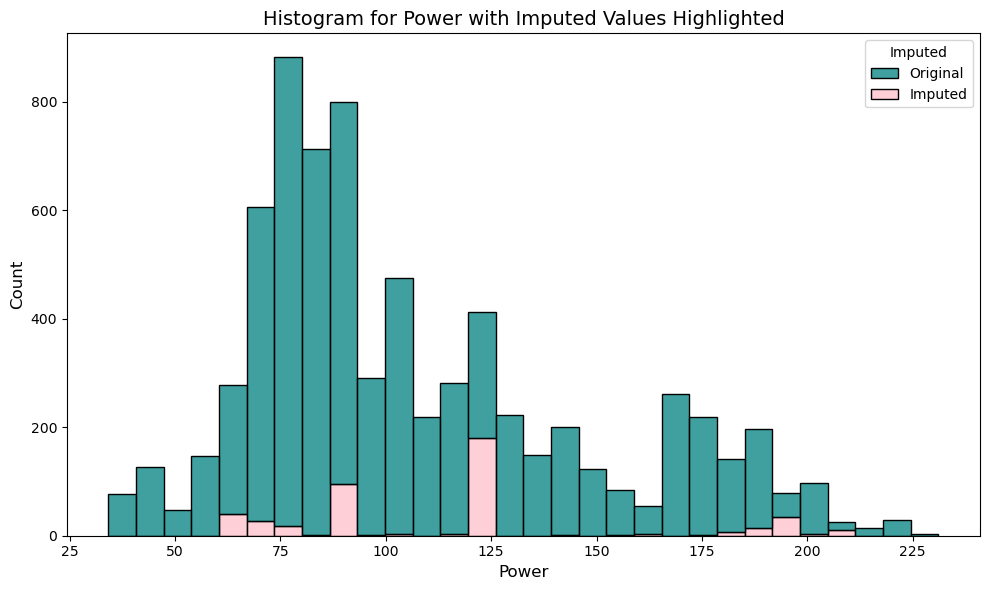

/Users/monicalokare/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


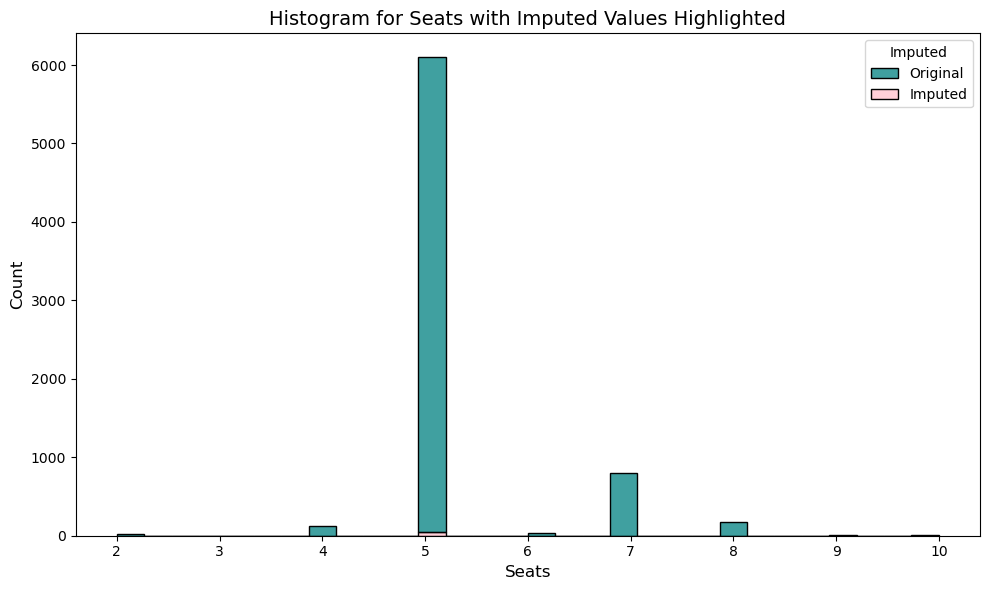

In [120]:
def plot_histogram(df, column, imputed_column, title):
    df['Imputed'] = imputed_column.map({True: 'Imputed', False: 'Original'})
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue='Imputed', bins=30, kde=False, palette=['teal', 'pink'], multiple="stack")
    plt.title(f'Histogram for {title} with Imputed Values Highlighted', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_histogram(df_imputation, 'Engine', df_imputation['imputed_engine'], 'Engine')
plot_histogram(df_imputation, 'Power', df_imputation['imputed_power'], 'Power')
plot_histogram(df_imputation, 'Seats', df_imputation['imputed_seats'], 'Seats')

#### Imputation methods has helped filling missing values across all the columns (Engine , Power, Seats)  Where imputation statergy has particularly worked for Power and Engine using Fuel_type. The pink bars in the histogram is the imputed values that most missing values were filled preseving the overall distribution of the columns. The teal color is the original data distribution.
- Most engines values were concentrated around 1000-1500 with significant counts around 1200-1500 cc. The imputed values are relatively few and they are spread across the different engine size ranges.
- Imputed values are shown in pink with more imputation in the lower power ranges around 75 to 125 hp than at higher power ranges. The missing values for power were reduced significantly from 448 to 273 after subclass-based imputation and eventually to 0 after completing the imputation process, indicating that all missing power values were filled.
- The Seats column is heavily skewed towards 5-seater vehicles, with very few cars having 7 or more seats. There are very few imputed values for seats, as seen by the minimal pink bars in the histogram.

#### f) Count(print) missing values for each column in the columns of ‘Mileage’ and ‘Price’

In [124]:
df_imputation['imputed_mileage'] = df_imputation['Mileage'].isnull()
df_imputation['imputed_price'] = df_imputation['Price'].isnull()
missing_values_count = df_imputation[['Mileage', 'Price']].isnull().sum()
print("Missing values excluding outliers before imputation:")
print(missing_values_count)

Missing values excluding outliers before imputation:
Mileage       0
Price      1234
dtype: int64


#### As mentioned in above step price has many missing values therefore the count is high

In [126]:
outlier_columns = ['Mileage', 'Price']
outlier_counts = {}
for col in outlier_columns:
    outlier_count = treat_outliers_as_missing(df_imputation, col)
    outlier_counts[col] = outlier_count

#Mark additional outliers treated as missing for each column
df_imputation['imputed_mileage'] = df_imputation['imputed_mileage'] | df_imputation['Engine'].isnull()
df_imputation['imputed_price'] = df_imputation['imputed_price'] | df_imputation['Power'].isnull()

total_missing_values_count = df_imputation[outlier_columns].isnull().sum()
print("\nSummary of Missing Values and Outliers:")
for col in outlier_columns:
    print(f"{col}:")
    print(f"  Original Missing Values: {missing_values_count[col]}")
    print(f"  Outliers treated as NaN: {outlier_counts[col]}")
    print(f"  Total Missing Values including outliers: {total_missing_values_count[col]}")
    print()


Summary of Missing Values and Outliers:
Mileage:
  Original Missing Values: 0
  Outliers treated as NaN: 82
  Total Missing Values including outliers: 82

Price:
  Original Missing Values: 1234
  Outliers treated as NaN: 718
  Total Missing Values including outliers: 1952



#### Since both missing values in mileage for electric vehicle were taken care there are no missing values however, there were outliers on both the upper and lower ends . The Price column has a high number of missing values, both from the original data (1234) and from outlier treatment (718). This suggests that nearly 20-25% of the data may be missing for price, which could significantly impact analysis or model performance if not properly handled. Using linear regression for handling it.

#### g)Find which columns have strong correlations with ‘Mileage’ or ‘Price’.

In [131]:
# showing the correlation again to find the strongest correlation for Mileage and Price
def calculate_pearson_correlation(df, col1, col2):
    correlation = df[[col1, col2]].dropna().corr(method='pearson').iloc[0, 1]
    return correlation

def find_strongest_correlations(df, target_columns, numerical_columns):
    strongest_correlations = {}
    for target in target_columns:
        print(f"\nCorrelations with {target}:")
        strongest_corr = None
        strongest_col = None
        for col in numerical_columns:
            if col != target:
                correlation = calculate_pearson_correlation(df, target, col)
                print(f"Pearson correlation between {target} and {col}: {correlation:.4f}")
                if strongest_corr is None or abs(correlation) > abs(strongest_corr):
                    strongest_corr = correlation
                    strongest_col = col
        if strongest_col:
            strongest_correlations[target] = (strongest_col, strongest_corr)
    return strongest_correlations

#### h) Build the linear regression model using scikit-learn library and apply the model to impute the missing values.

In [133]:
# Step 3: Use linear regression to impute missing values
def linear_regression_imputation(df, target_column, predictor_column):
    df_missing = df[df[target_column].isnull()]
    df_not_missing = df[df[target_column].notnull()]
    
    if df_missing.empty:
        return df
    
    X_train = df_not_missing[[predictor_column]].dropna()
    y_train = df_not_missing[target_column].dropna()
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    X_missing = df_missing[[predictor_column]].dropna()
    predicted_values = model.predict(X_missing)
    
    df.loc[df[target_column].isnull(), target_column] = predicted_values
    
    return df

In [135]:
# Mark imputed values for visualization
def mark_imputed_values(df, column):
    return df[column].isnull()
df_imputation['imputed_mileage'] = mark_imputed_values(df_imputation, 'Mileage')
df_imputation['imputed_price'] = mark_imputed_values(df_imputation, 'Price')

# Find the strongest correlations
target_columns = ['Mileage', 'Price']
numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
strongest_correlations = find_strongest_correlations(df_no_outliers, target_columns, numerical_columns)


Correlations with Mileage:
Pearson correlation between Mileage and Car_Age: -0.4293
Pearson correlation between Mileage and Kilometers_Driven: -0.0922
Pearson correlation between Mileage and Engine: -0.4723
Pearson correlation between Mileage and Power: -0.4827
Pearson correlation between Mileage and Seats: nan
Pearson correlation between Mileage and Price: -0.0611

Correlations with Price:
Pearson correlation between Price and Car_Age: -0.4471
Pearson correlation between Price and Kilometers_Driven: -0.2094
Pearson correlation between Price and Mileage: -0.0611
Pearson correlation between Price and Engine: 0.4946
Pearson correlation between Price and Power: 0.6030
Pearson correlation between Price and Seats: nan


In [137]:
# Impute missing values based on strongest correlations
for target_column, (strongest_predictor, correlation_value) in strongest_correlations.items():
    print(f"Imputing missing values for {target_column} using {strongest_predictor} (correlation: {correlation_value:.4f})")
    df_imputation = linear_regression_imputation(df_imputation, target_column, strongest_predictor)

Imputing missing values for Mileage using Power (correlation: -0.4827)
Imputing missing values for Price using Power (correlation: 0.6030)


#### The strongest correlation value for both price and mileage is power

#### i) Please draw histogram(distribution) for each column and use different color for the imputed missing values

In [142]:
#Plotting the histogram with different color for imputed values
def plot_histogram(df, column, imputed_column, title, palette):
    df['Imputed'] = imputed_column.map({True: 'Imputed', False: 'Original'})
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue='Imputed', bins=30, kde=False, palette=palette, multiple="stack")
    plt.title(f'Histogram for {title} with Imputed Values Highlighted', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()

/Users/monicalokare/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


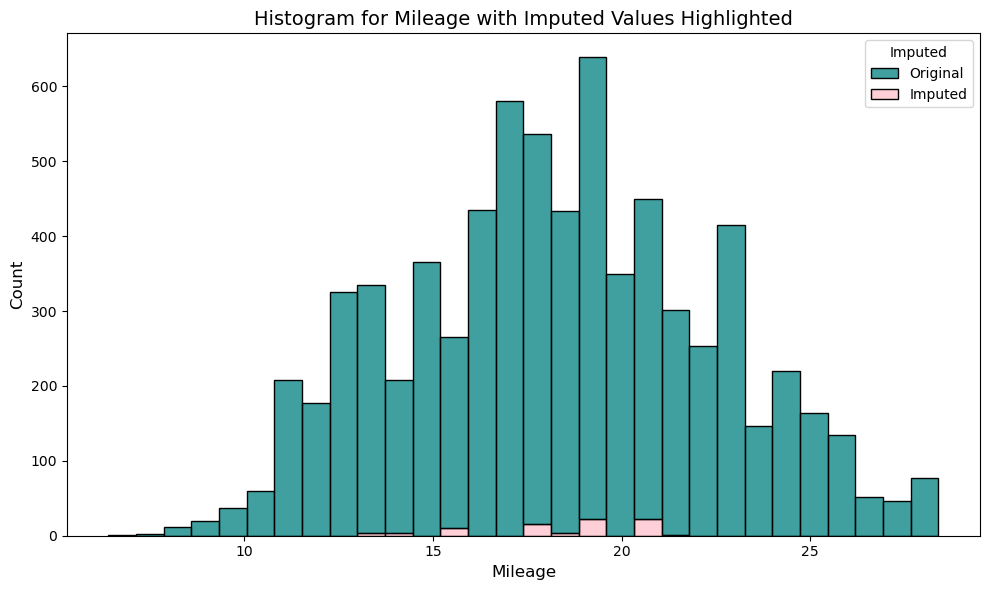

/Users/monicalokare/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


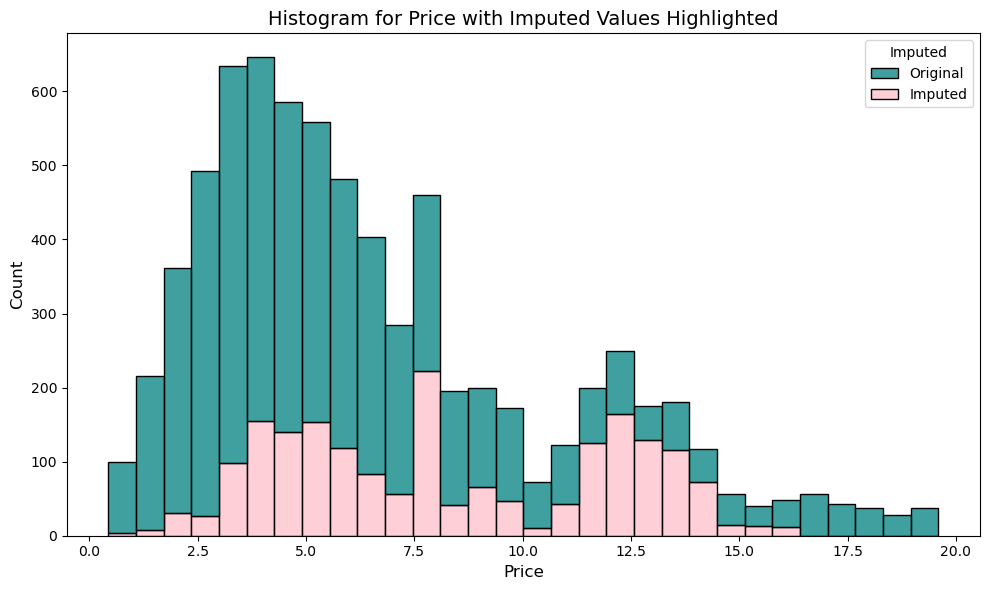

In [146]:
plot_histogram(df_imputation, 'Mileage', df_imputation['imputed_mileage'], 'Mileage', palette=['teal', 'pink'])
plot_histogram(df_imputation, 'Price', df_imputation['imputed_price'], 'Price', palette=['teal', 'pink'])

#### Linear regression is used as the imputation function to fill the missing values based on predictor column and have split into two subsets one is with missing values and one without missing values in the target column. The model is trained on the subsets without missing values using predictor column to predict the target tcolumn. 
- The distribution of Mileage with imputed values is shown in pink and original values in teal. The majority of mileage values range between 10 and 25 kmpl, with most cars concentrated around 15 to 22 kmpl. The imputed values are scattered across the distribution, indicating that missing or outlier values were filled using appropriate measures. This distribution is relatively normal, with no extreme skewness.
- The Price distribution shows a larger portion of imputed values in pink in the mid-range between 3 and 10 units. There is a clear right-skewed distribution, with most vehicles priced under 10 units and a long tail toward higher prices. The imputed values seem to be reasonably distributed across the entire price range, ensuring that the dataset has been adequately filled. This highlights that a considerable number of vehicles were missing price values, which were successfully imputed.